<a href="https://colab.research.google.com/github/sagiv-bar/My-pordfolio/blob/main/FinalProject_DL_March25_Sagiv_bar_%26_Dor_halevy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classificaiton Problem - Sagiv Bar & Dor Halevy

### importing packages

In [ ]:
# import numpy as np
# import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('future.no_silent_downcasting', True)
# # pd.set_option('display.max_rows', None)
# import sweetviz as sv
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math
# import joblib
# import xgboost as xgb
# import scipy.stats as stats
# import tensorflow as tf
# import keras
# import sklearn
# import statsmodels
# from scikeras.wrappers import KerasClassifier
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, silhouette_score, confusion_matrix, classification_report, roc_auc_score, log_loss
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import layers
# from sklearn.decomposition import PCA

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)
import joblib
import math
#stats and analysis
import sweetviz as sv
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# ML
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, log_loss, silhouette_score)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Advanced ML
import xgboost as xgb
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping


# ---------------- EDA and Data Preprocessing (# 1-3) -------------------

### Data Preview

In [ ]:
# Kaggle dataset https://www.kaggle.com/code/devraai/diabetes-data-analysis-modeling
data = pd.read_csv('C:/Users/user/Desktop/diabetes_dataset_with_notes.csv')
display(data.head(10))

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0,Elderly patient with increased risk of chronic...
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0,"Healthy BMI range. History of smoking, potenti..."
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0,"Young patient, generally lower risk but needs ..."
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0,"Obese category, increased risk for diabetes an..."
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0,"Overweight, advised dietary and exercise modif..."


### Automated EDA
A quick and convenient way to explore variable distributions, detect data abnormalities, and identify associations.

                                             |          | [  0%]   00:00 -> (? left)


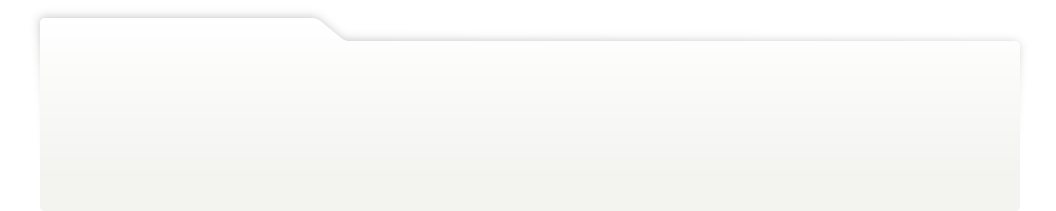
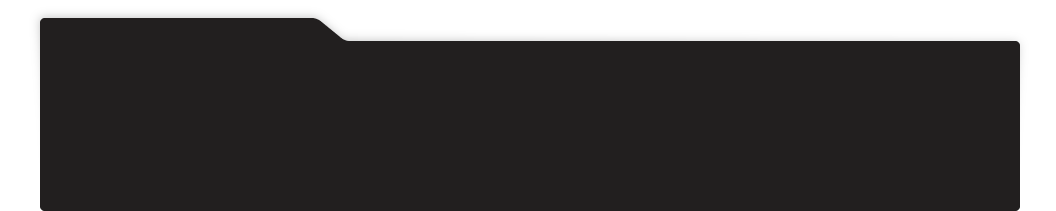
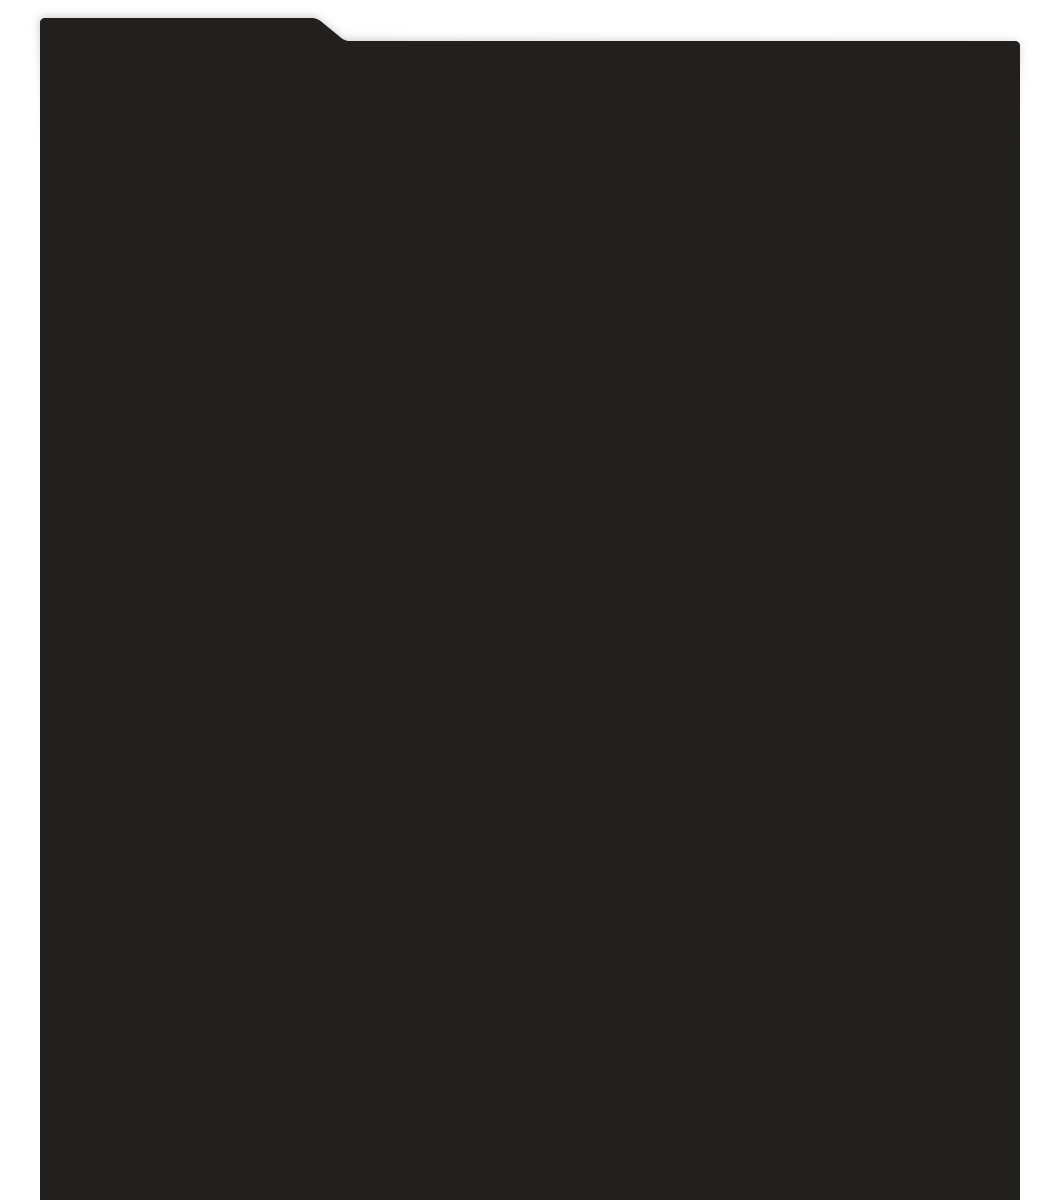
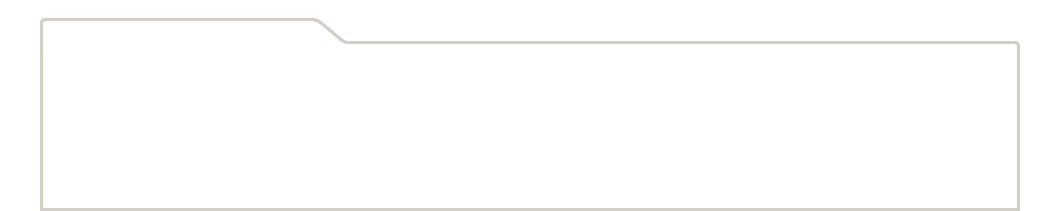
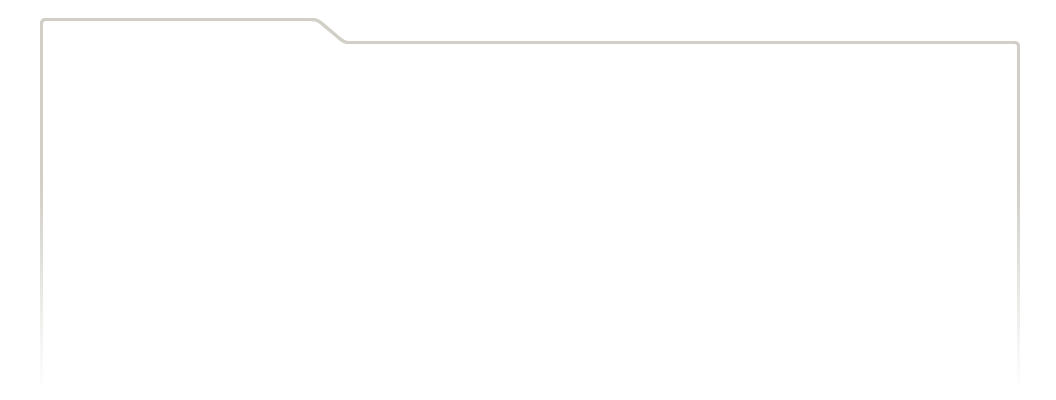
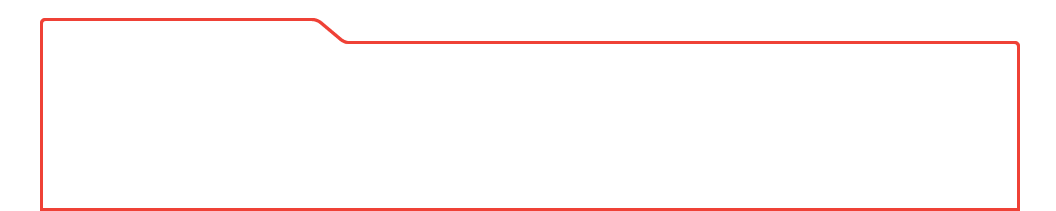
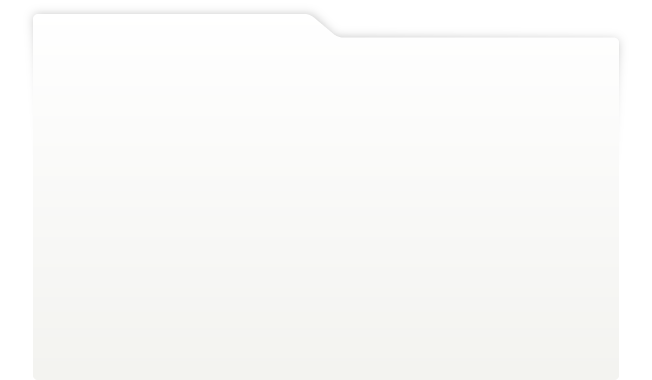
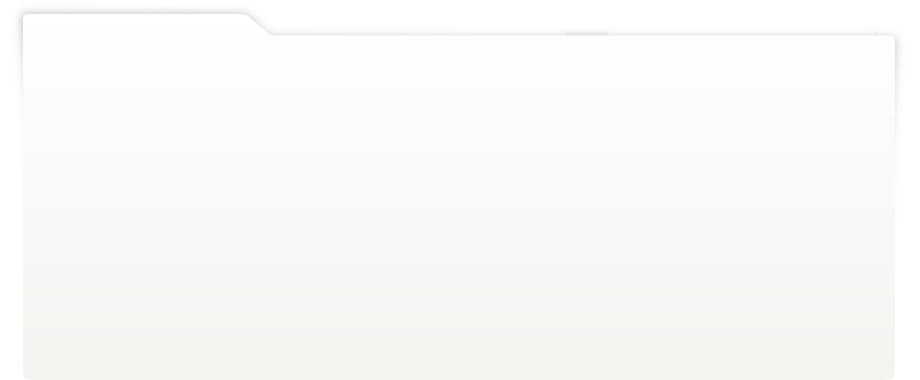
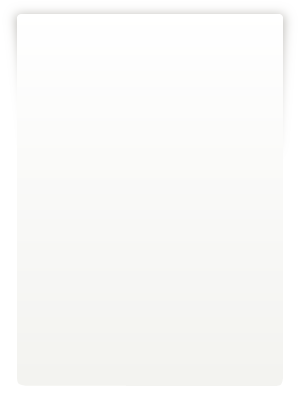
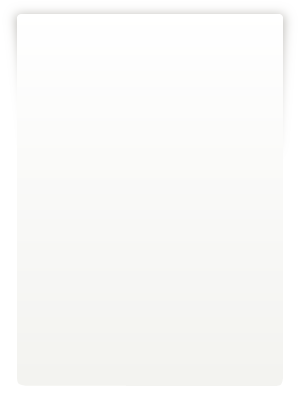
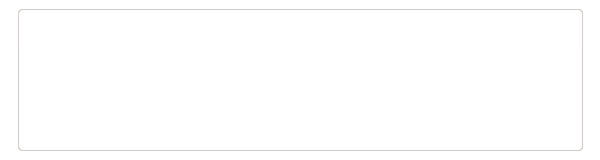
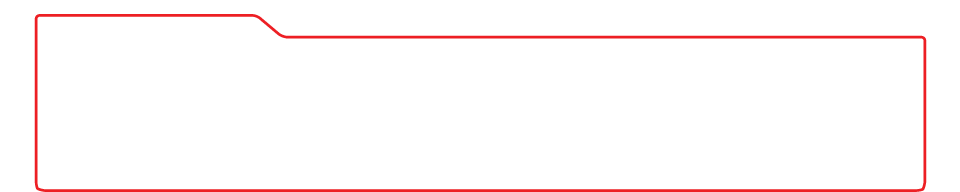
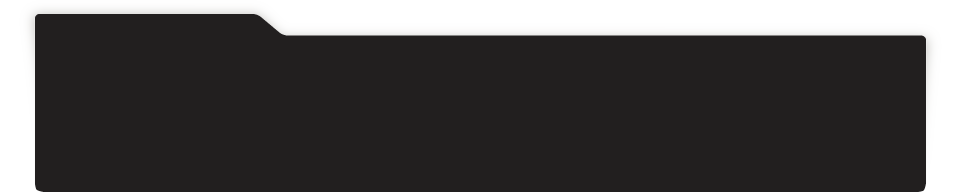
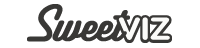
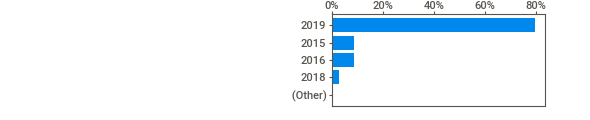
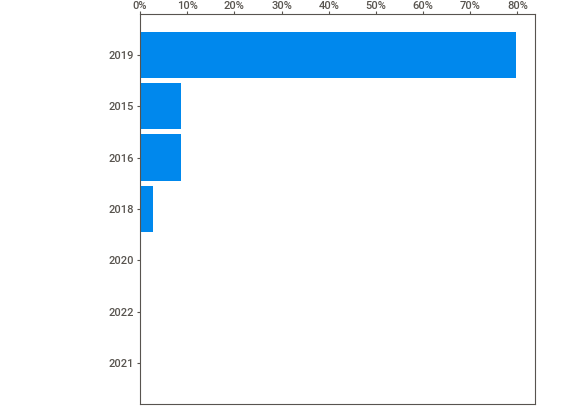
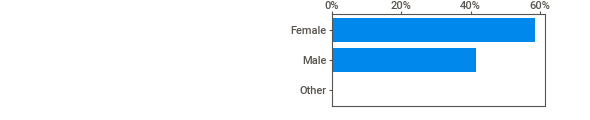
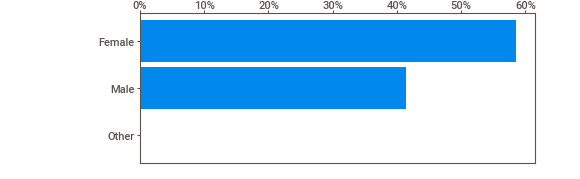
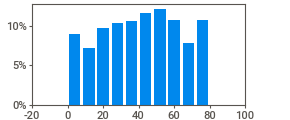
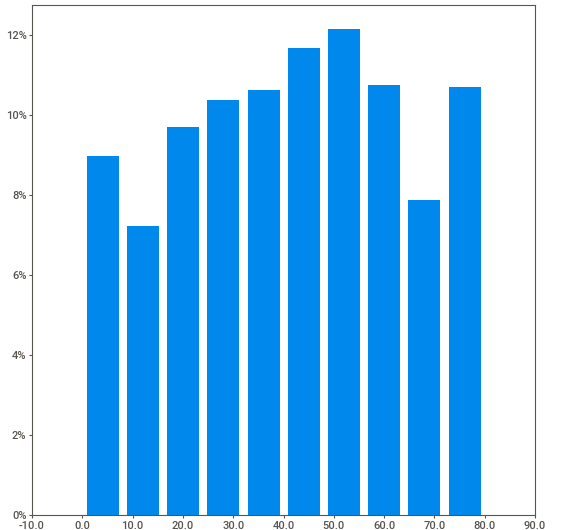
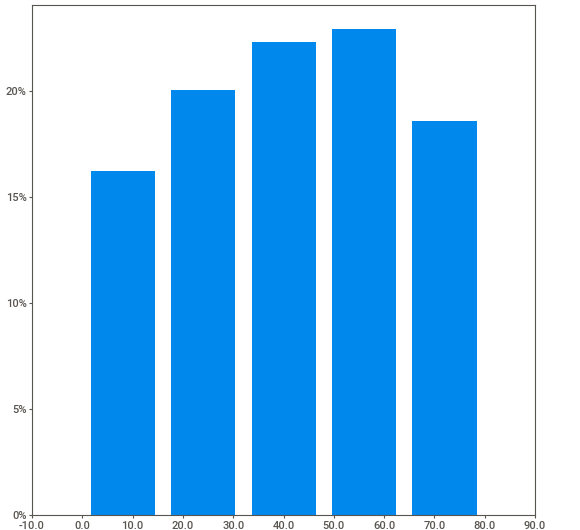
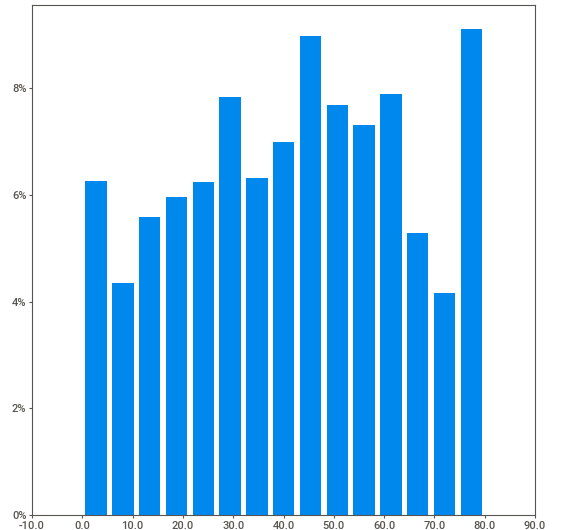
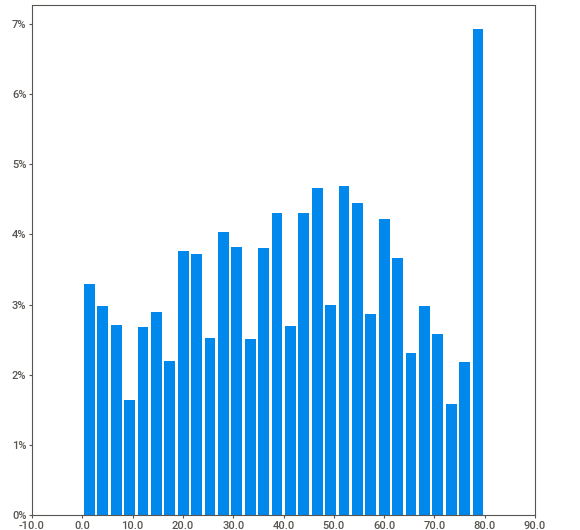
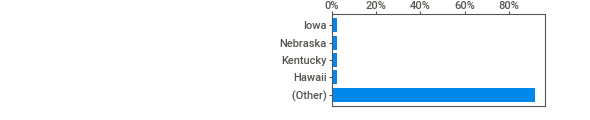
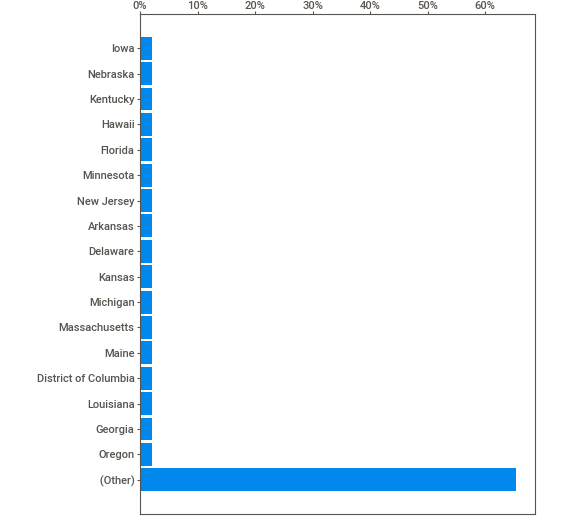
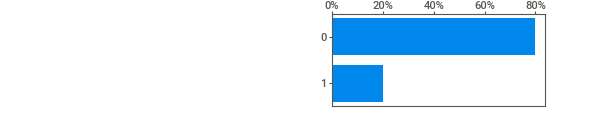
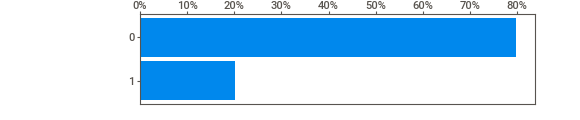
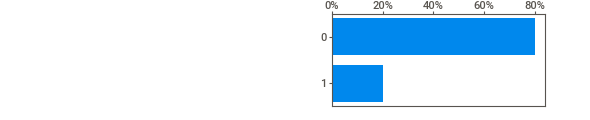
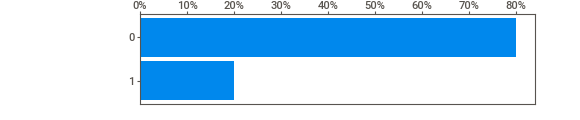
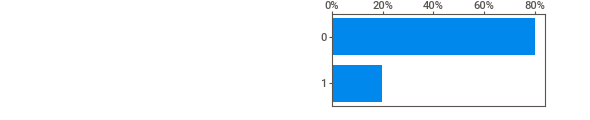
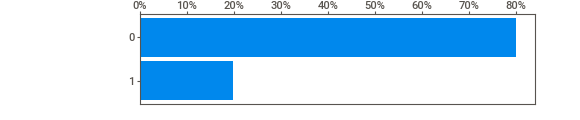
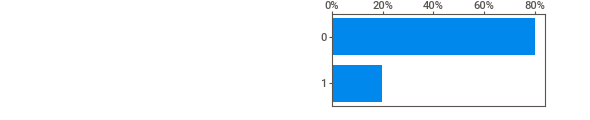
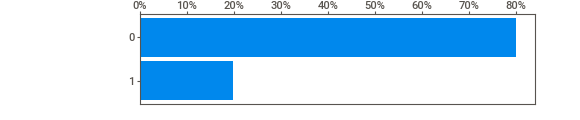
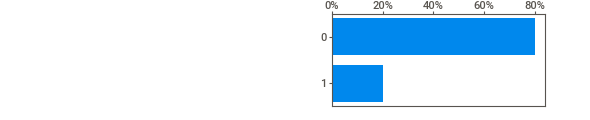
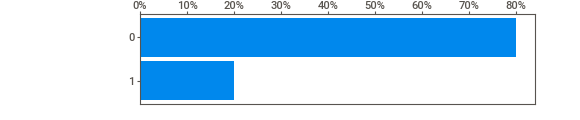
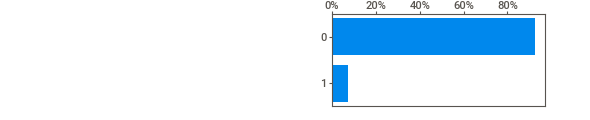
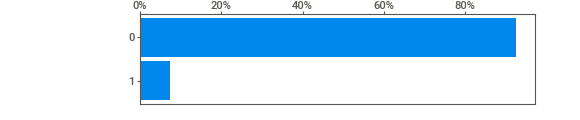
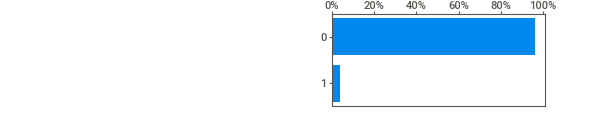
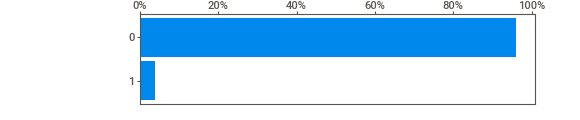
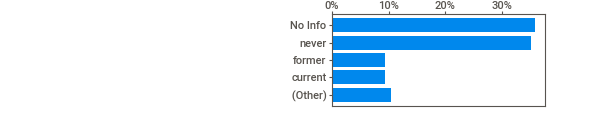
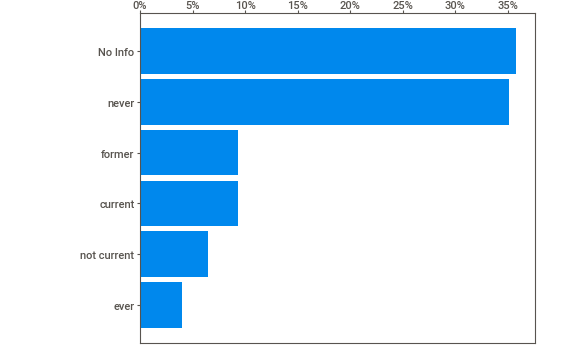
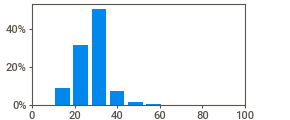
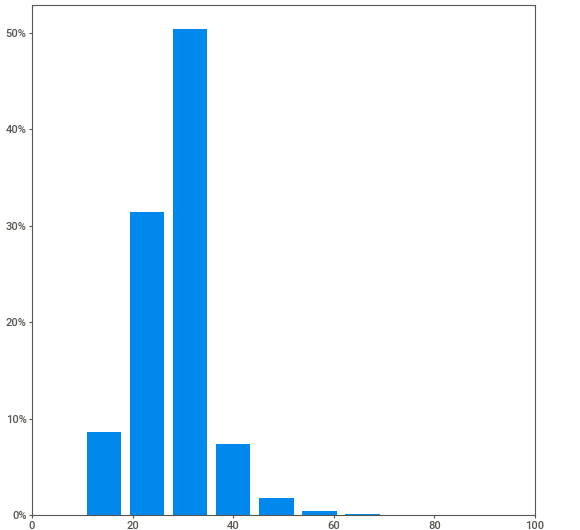
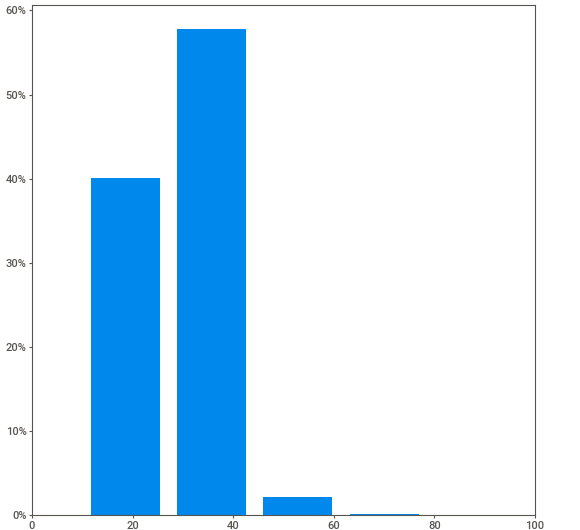
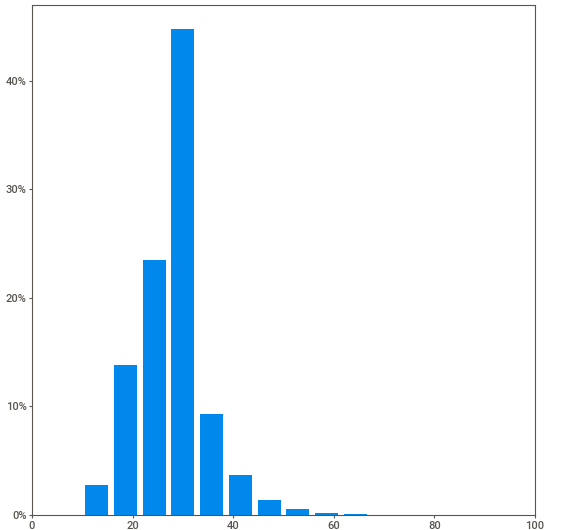
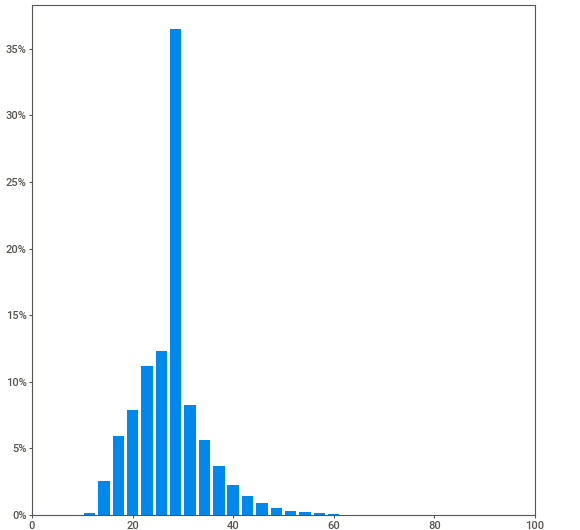
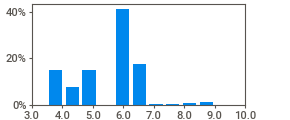
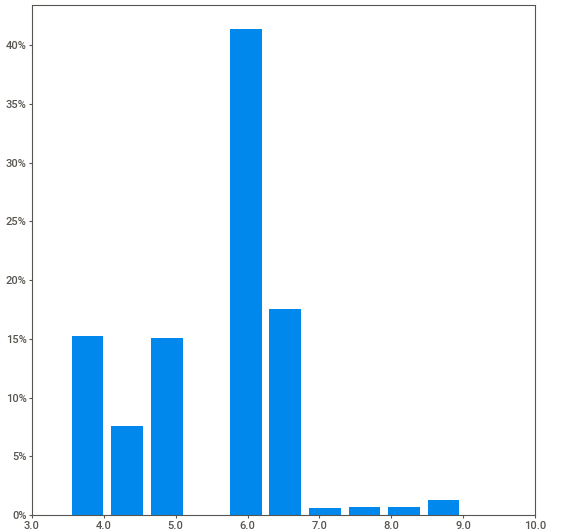
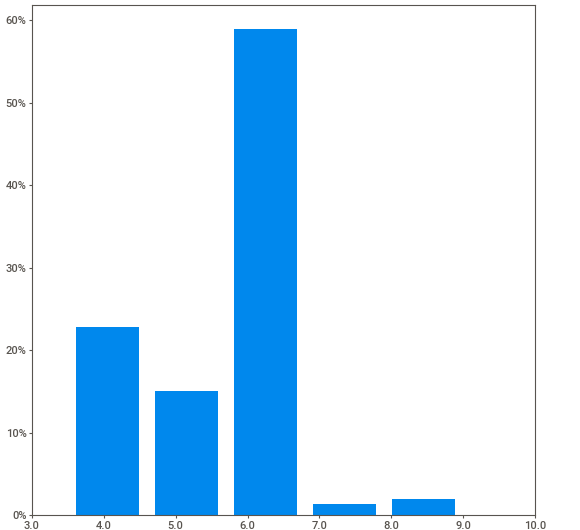
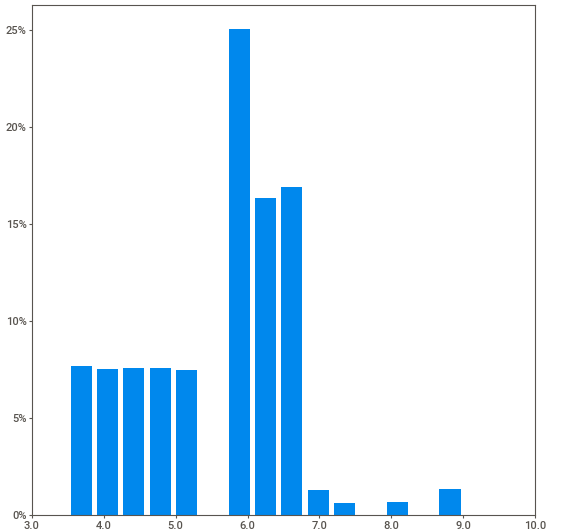
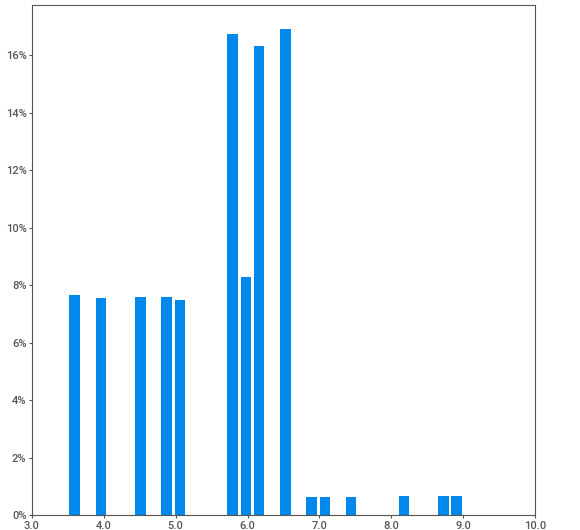
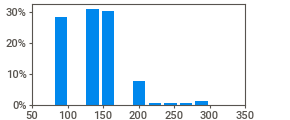
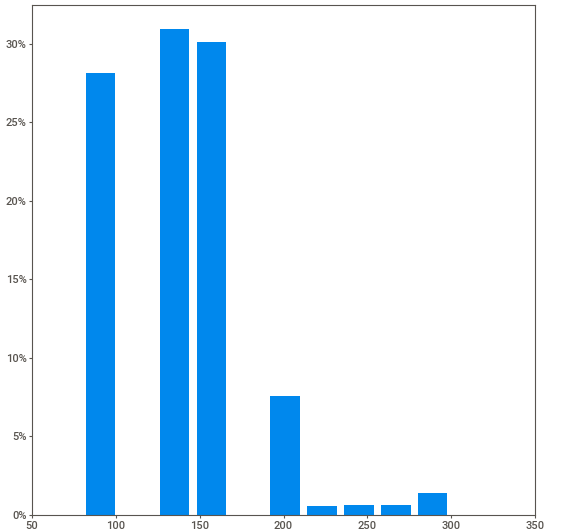
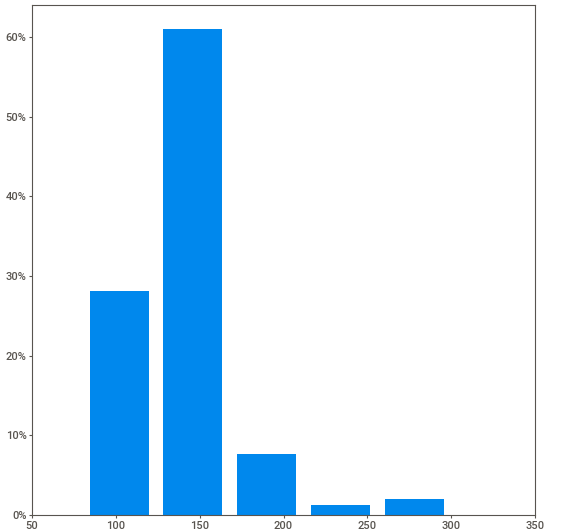
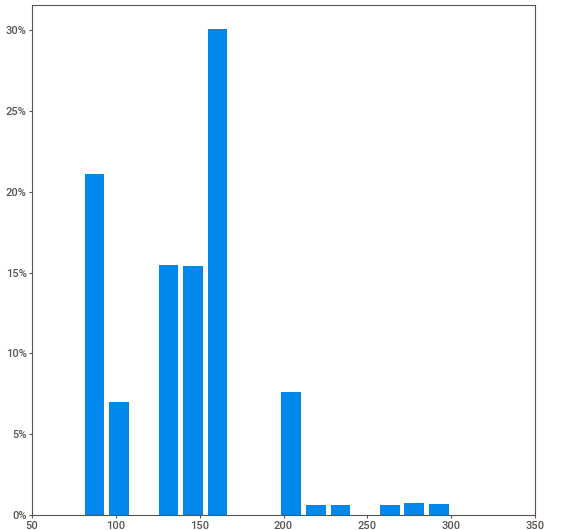
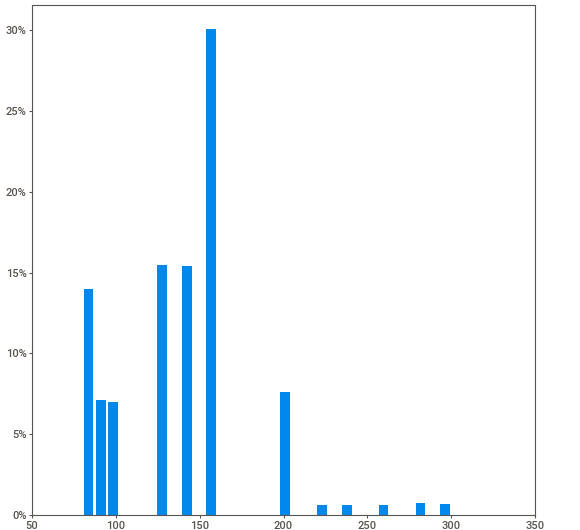
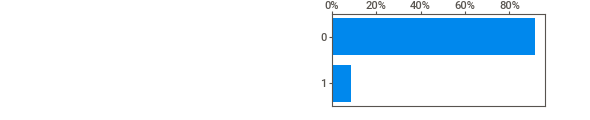
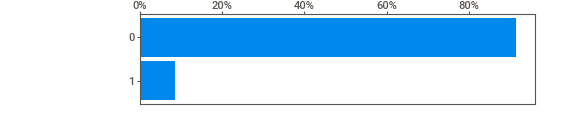
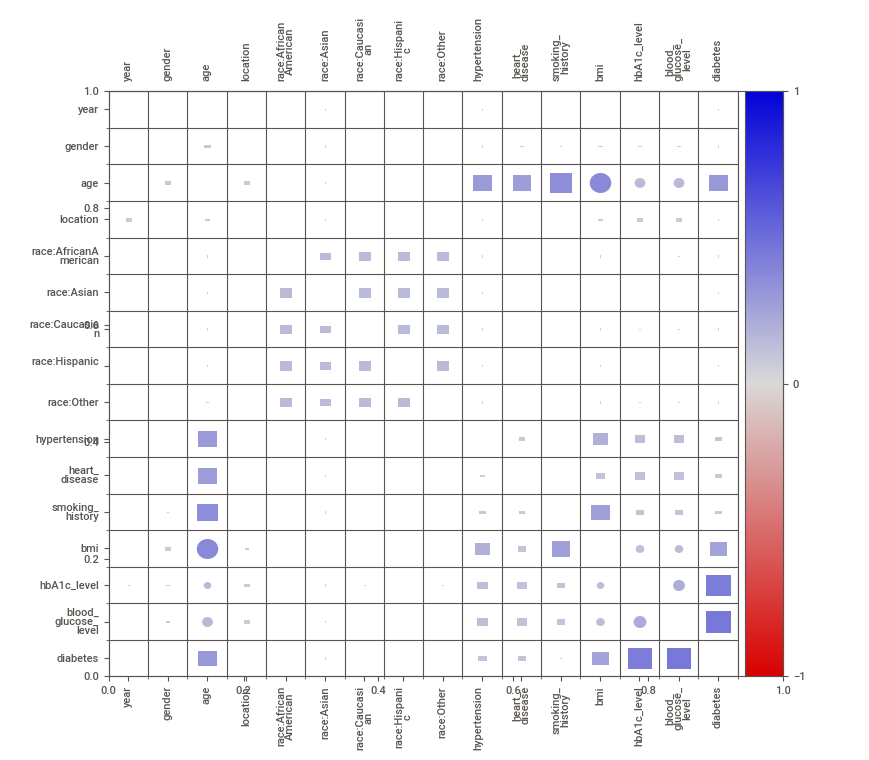
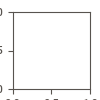

In [ ]:
# Create the sweetviz report
diabetes_report = sv.analyze(data)
# Save the report to an HTML file
diabetes_report.show_notebook()

# Scatter plots
Scatter Plot של HbA1c מול Glucose


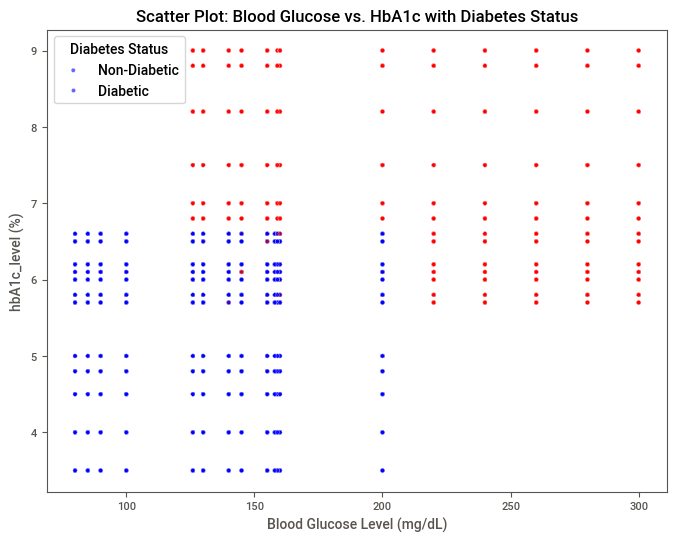

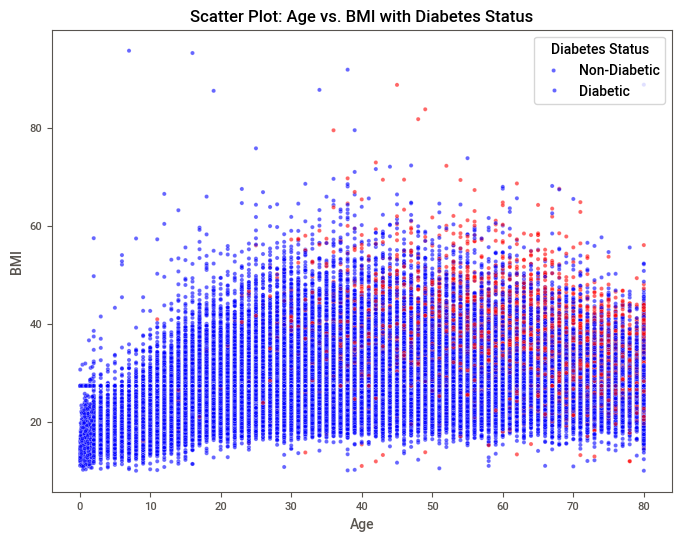

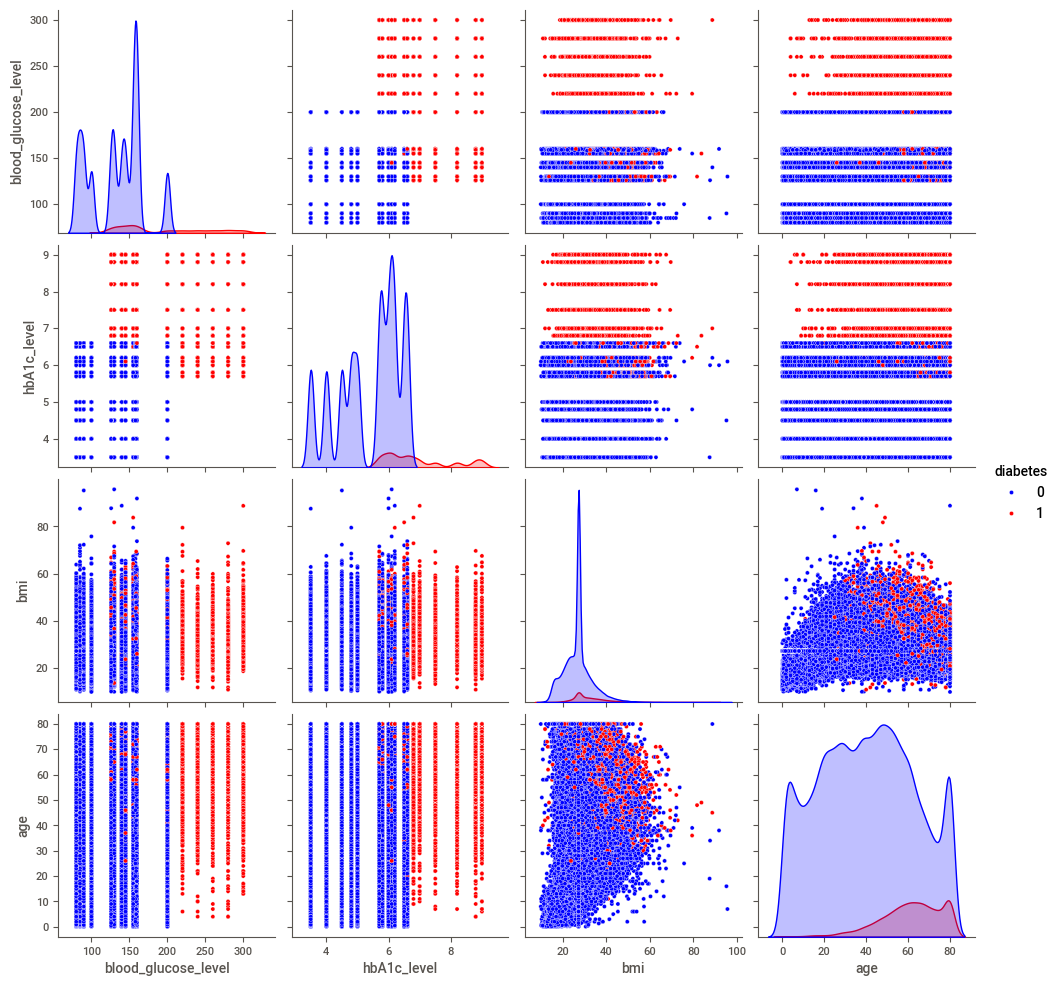

In [ ]:
# Scatter Plot  HbA1c VS Glucose
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {0: "blue", 1: "red"}
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["blood_glucose_level"],
                y=data["hbA1c_level"],
                hue=data["diabetes"],
                alpha=0.6,
                palette=custom_palette)

plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("hbA1c_level (%)")
plt.title("Scatter Plot: Blood Glucose vs. HbA1c with Diabetes Status")
plt.legend(title="Diabetes Status", labels=["Non-Diabetic", "Diabetic"])
plt.show()

# Scatter Plot  BMI VS AGE
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["age"],
                y=data["bmi"],
                hue=data["diabetes"],
                alpha=0.6,
                palette=custom_palette )

plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot: Age vs. BMI with Diabetes Status")
plt.legend(title="Diabetes Status", labels=["Non-Diabetic", "Diabetic"])
plt.show()

# Pair Plot
sns.pairplot(data, hue="diabetes", vars=["blood_glucose_level", "hbA1c_level", "bmi", "age"], palette=custom_palette)
plt.show()


### Manual EDA and Data handling

In [ ]:
print('diabetes columns: ',"\n",data.columns,"\n",'shape:',data.shape ,"\n",'size:',data.size,"\n",'duplicated rows:', data.duplicated().sum())

diabetes columns:  
 Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object') 
 shape: (100000, 17) 
 size: 1700000 
 duplicated rows: 14


In [ ]:
# clinical_notes is not a varaible that we can work with cuurently; year is not informative and also quiet uniformed
data=data.drop(columns=['clinical_notes','year'])

In [ ]:
data.isnull().sum()

gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [ ]:
print('Duplicated Rows', data.duplicated().sum())
data=data.drop_duplicates()

Duplicated Rows 20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99980 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                99980 non-null  object 
 1   age                   99980 non-null  float64
 2   location              99980 non-null  object 
 3   race:AfricanAmerican  99980 non-null  int64  
 4   race:Asian            99980 non-null  int64  
 5   race:Caucasian        99980 non-null  int64  
 6   race:Hispanic         99980 non-null  int64  
 7   race:Other            99980 non-null  int64  
 8   hypertension          99980 non-null  int64  
 9   heart_disease         99980 non-null  int64  
 10  smoking_history       99980 non-null  object 
 11  bmi                   99980 non-null  float64
 12  hbA1c_level           99980 non-null  float64
 13  blood_glucose_level   99980 non-null  int64  
 14  diabetes              99980 non-null  int64  
dtypes: float64(3), int64(9),

In [ ]:
diabetes=data.copy()
diabetes['gender']=diabetes['gender'].astype('category')
diabetes['smoking_history']=diabetes['smoking_history'].astype('category')
diabetes['location']=diabetes['location'].astype('category')

columns_to_convert = [
    'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
    'race:Hispanic', 'race:Other', 'heart_disease',
    'hypertension', 'diabetes'
]
diabetes[columns_to_convert] = diabetes[columns_to_convert] == 1
diabetes[columns_to_convert]=diabetes[columns_to_convert].astype('bool')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99980 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                99980 non-null  category
 1   age                   99980 non-null  float64 
 2   location              99980 non-null  category
 3   race:AfricanAmerican  99980 non-null  bool    
 4   race:Asian            99980 non-null  bool    
 5   race:Caucasian        99980 non-null  bool    
 6   race:Hispanic         99980 non-null  bool    
 7   race:Other            99980 non-null  bool    
 8   hypertension          99980 non-null  bool    
 9   heart_disease         99980 non-null  bool    
 10  smoking_history       99980 non-null  category
 11  bmi                   99980 non-null  float64 
 12  hbA1c_level           99980 non-null  float64 
 13  blood_glucose_level   99980 non-null  int64   
 14  diabetes              99980 non-null  bool    
dtypes: bool

In [ ]:
diabetes.describe()

,age,bmi,hbA1c_level,blood_glucose_level
count,99980.000000,99980.000000,99980.000000,99980.000000
mean,41.885353,27.320767,5.527534,138.060262
std,22.515866,6.637447,1.070675,40.709007
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


### Correlation Matrices

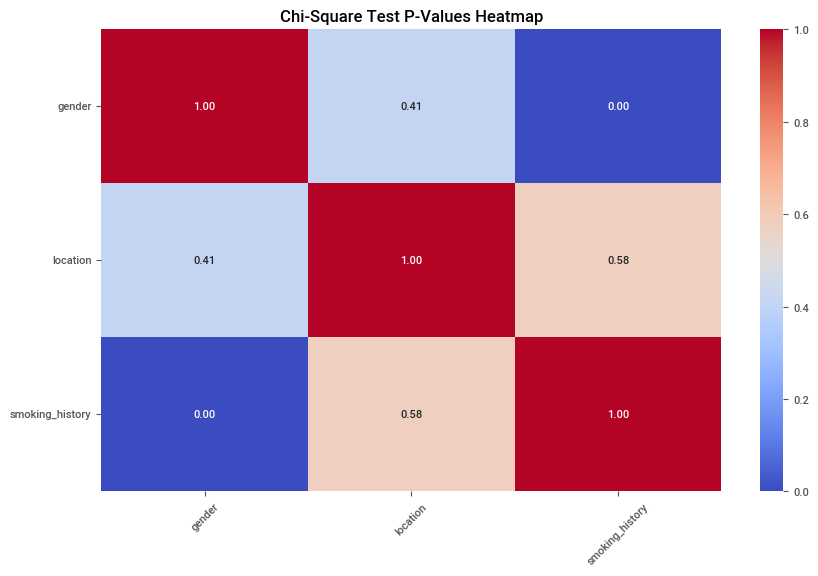

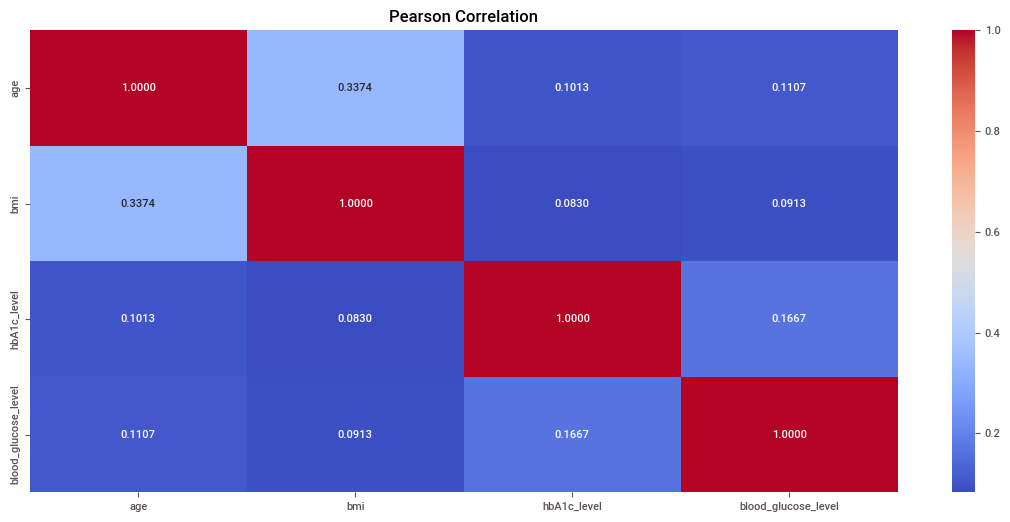

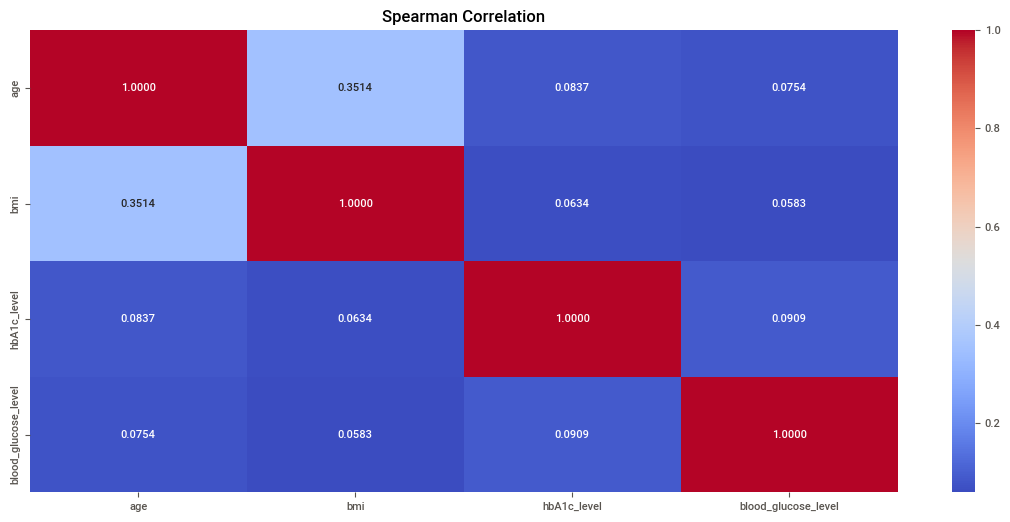

In [ ]:
# Select categorical columns
categorical_columns = diabetes.select_dtypes(include=['object', 'category']).columns

# Initialize an empty DataFrame to store p-values
chi2_matrix = pd.DataFrame(np.ones((len(categorical_columns), len(categorical_columns))),
                           index=categorical_columns, columns=categorical_columns)

# Compute Chi-Square test for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:  # Avoid self-comparison
            contingency_table = pd.crosstab(diabetes[col1], diabetes[col2])
            chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = p

# Create a heatmap for Chi-Square correlation (p-values)
plt.figure(figsize=(10, 6))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', cbar=True, annot_kws={"size": 8}, fmt=".2f")
plt.title('Chi-Square Test P-Values Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Select numeric columns for correlation analysis
df_numeric = diabetes.select_dtypes(include=['int64', 'float64'])
df_numeric = diabetes.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrices
pearson_corr = df_numeric.corr(method='pearson')
spearman_corr = df_numeric.corr(method='spearman')

# Pearson correlation heatmap (separate figure)
fig1, ax1 = plt.subplots(figsize=(14, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=ax1, cbar=True, annot_kws={"size": 8}, fmt=".4f")
ax1.set_title('Pearson Correlation')
plt.show()

# Spearman correlation heatmap (separate figure)
fig2, ax2 = plt.subplots(figsize=(14, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=ax2, cbar=True, annot_kws={"size": 8}, fmt=".4f")
ax2.set_title('Spearman Correlation')
plt.show()

### Outlier Detection

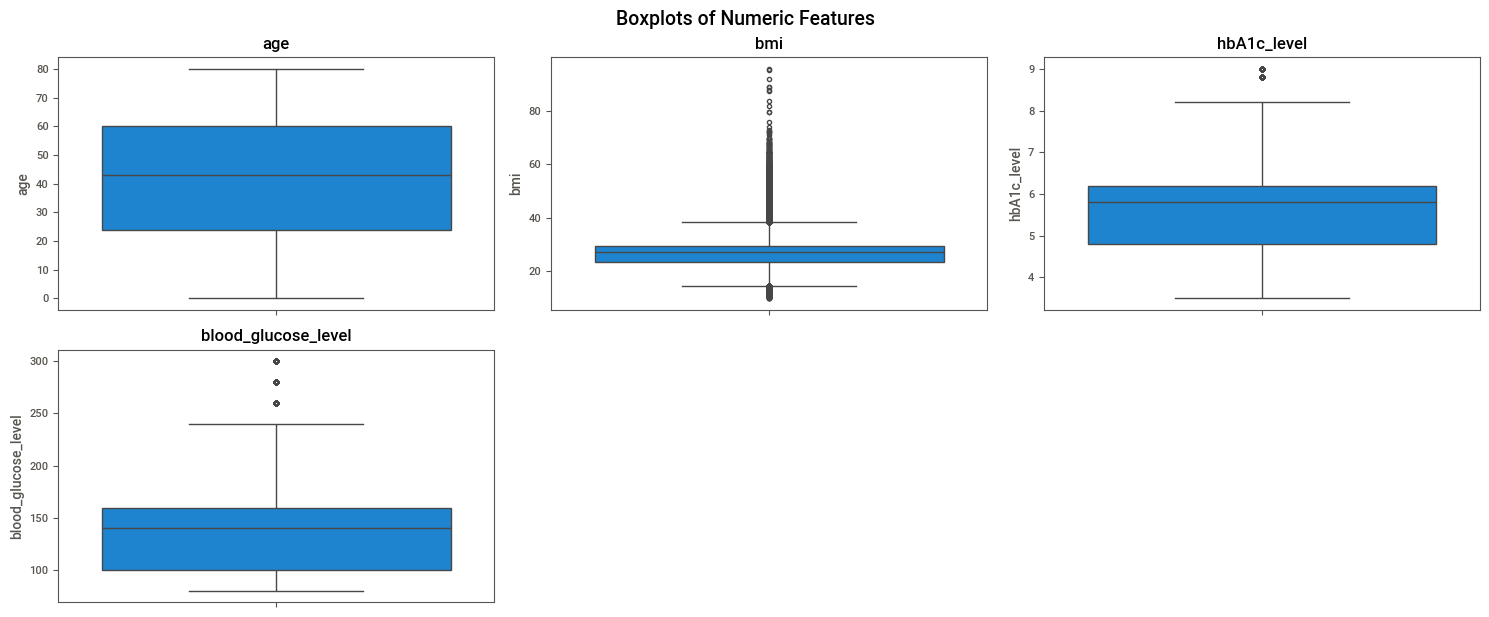

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of columns per row in subplots
NUM_COLS = 3

# Function to efficiently create subplots and plot boxplots/histograms
def plot_subplots(data, plot_func, title, is_boxplot=False):
    if data.empty:
        print(f"Warning: No data available for {title}")
        return

    num_features = len(data.columns)
    num_rows = int(np.ceil(num_features / NUM_COLS))  # Calculate required rows

    fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # Flatten for easier iteration

    # Plot each column
    for i, col in enumerate(data.columns):
        if is_boxplot:
            plot_func(y=data[col], ax=axes[i])  # Boxplot needs only y-axis
        else:
            plot_func(data[col], kde=False, ax=axes[i])  # Histplot

        axes[i].set_title(col)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(title, fontsize=14, y=1.02)  # Adjust title position
    plt.show()

# Ensure df_numeric and categorical_columns exist
if 'df_numeric' in locals() and not df_numeric.empty:
    # Plot boxplots for numeric features
    plot_subplots(df_numeric, sns.boxplot, "Boxplots of Numeric Features", is_boxplot=True)

### Categorical Varialbes Distributions

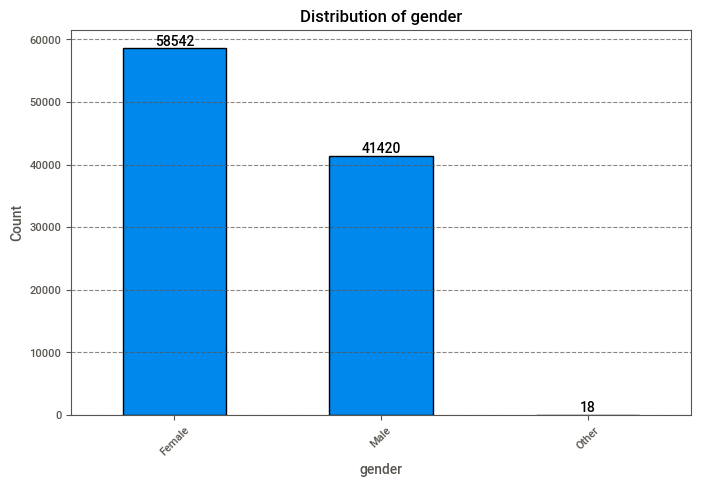

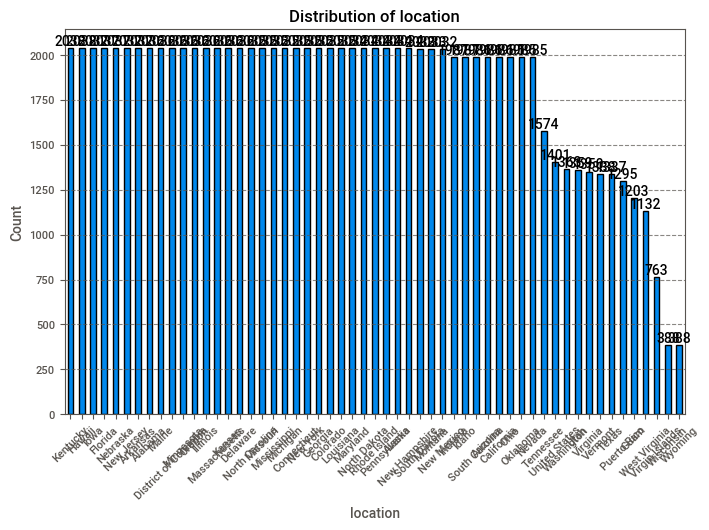

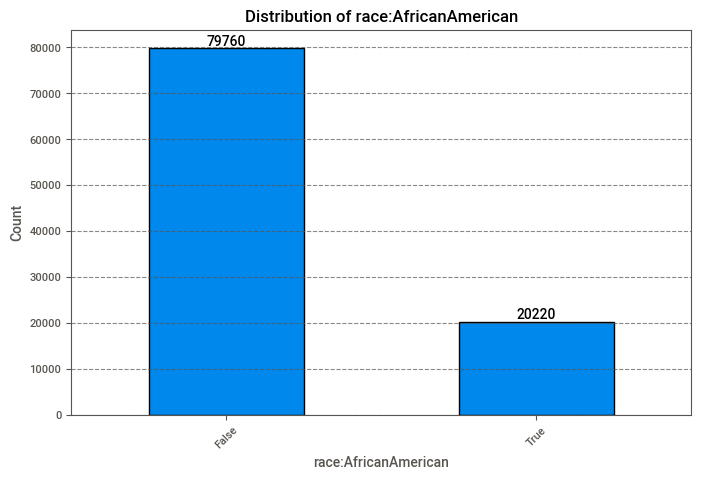

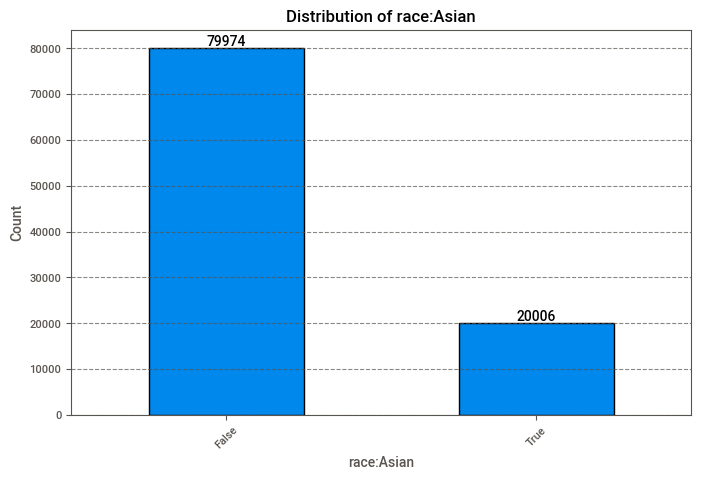

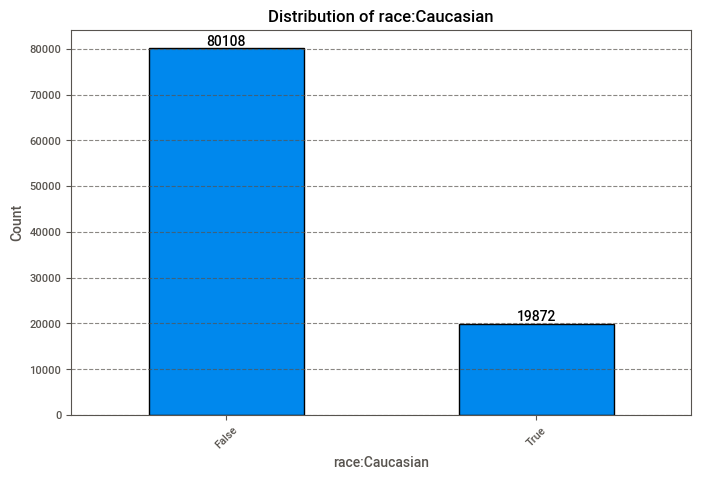

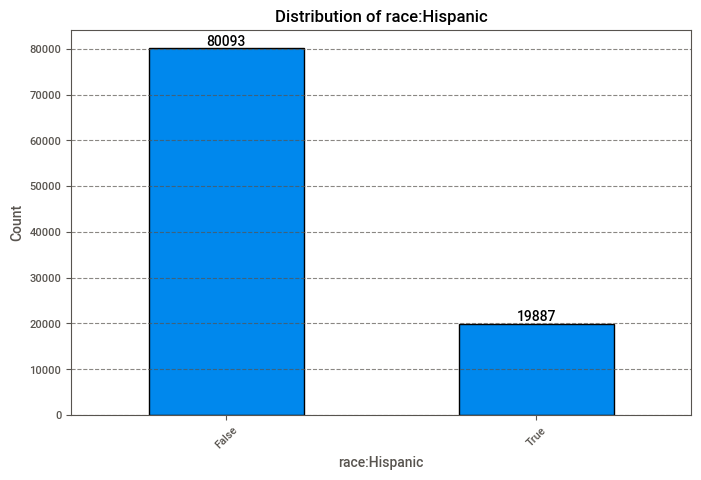

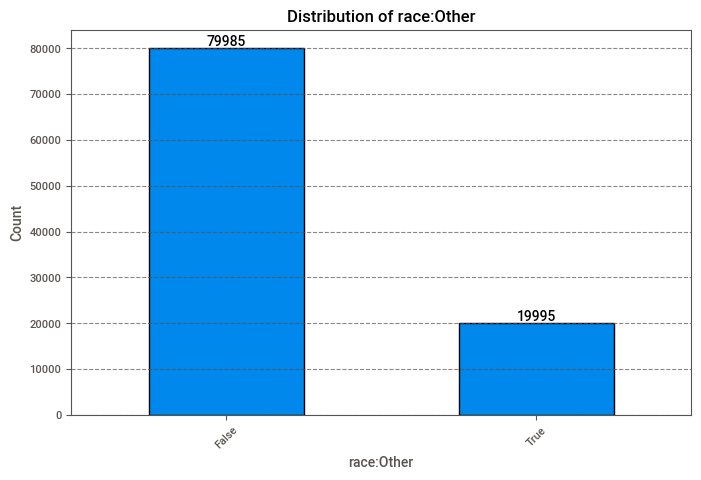

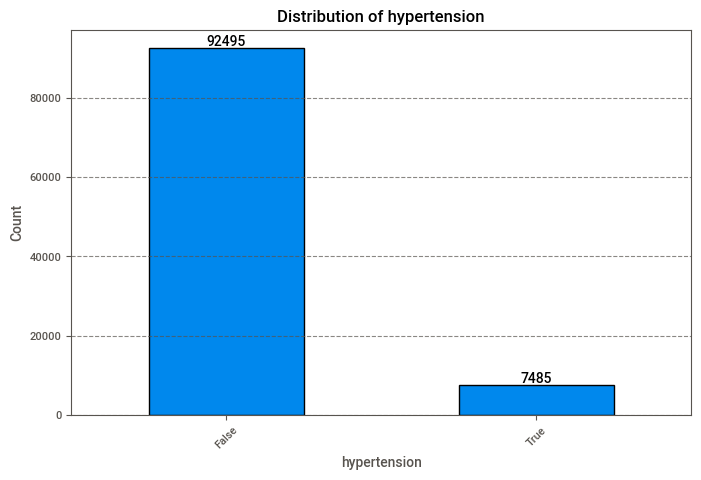

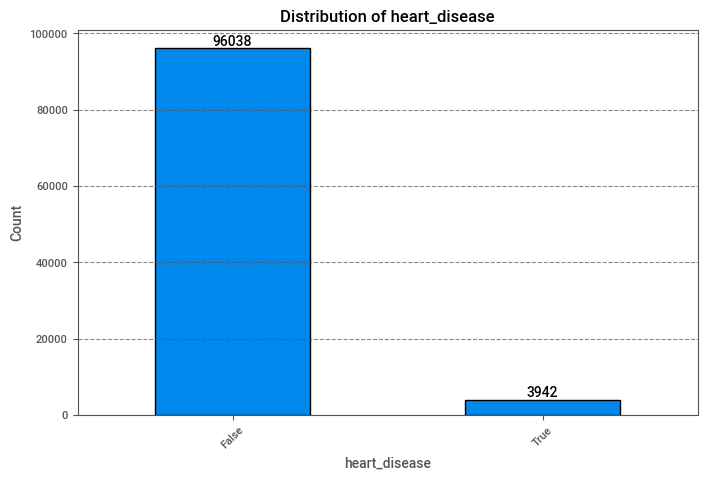

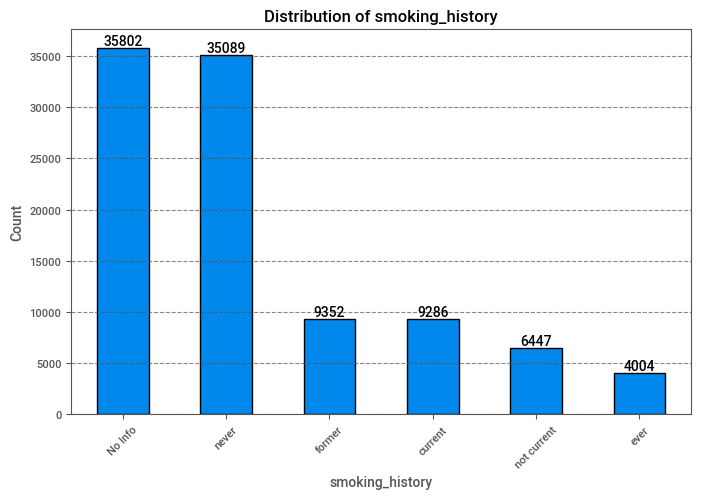

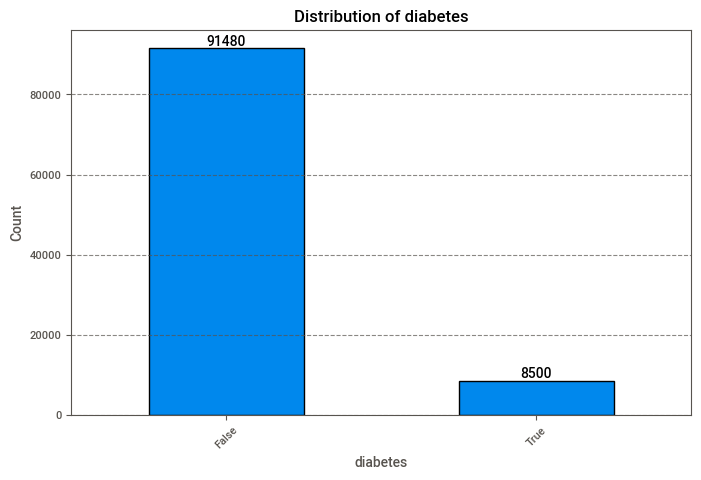

In [ ]:
def plot_categorical_distributions(df):
    """
    Plots histograms for categorical, boolean, and object-type columns in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing categorical/bool/object columns.
    """
    # Selecting categorical and boolean columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        ax = df[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add labels on top of bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

        plt.show()
plot_categorical_distributions(diabetes)

### Feature Engingeering

In [ ]:
# Categorizing Age into 3 groups
age_bins = [0, 30, 50, float('inf')]
age_labels = ['Young', 'Middle-aged', 'Senior']
diabetes['Age_Category'] = pd.cut(diabetes['age'], bins=age_bins, labels=age_labels, right=False)

# Categorizing BMI into 3 groups
bmi_bins = [0, 25, 30, float('inf')]
bmi_labels = ['Normal', 'Overweight', 'Obese']
diabetes['BMI_Category'] = pd.cut(diabetes['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

### Normalization and Scaling

In [ ]:
# Define feature groups
continuous_features = diabetes.select_dtypes(include=['int', 'float']).columns
binary_features = diabetes.select_dtypes(include=['bool']).columns
ordinal_features=diabetes.select_dtypes(include=['object', 'category']).columns
target_feature = ['diabetes']

# Copy original dataset
df_normalized = diabetes.copy()

# Standardize continuous features
scaler = StandardScaler()
df_normalized[continuous_features] = scaler.fit_transform(df_normalized[continuous_features])

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder()
df_normalized[ordinal_features] = ordinal_encoder.fit_transform(df_normalized[ordinal_features])

# Binary features are already 0/1, no need for changes
df_normalized.head()

,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,Age_Category,BMI_Category
0,0.0,-0.439042,0.0,False,False,False,False,True,False,False,4.0,-0.000116,-0.492714,-0.934939,False,0.0,2.0
1,0.0,-0.572282,0.0,False,True,False,False,False,False,False,4.0,-1.110488,-0.492714,-1.180586,False,2.0,0.0
2,1.0,-1.060828,0.0,False,False,False,False,True,False,False,4.0,-0.536469,-0.679513,0.538943,False,2.0,0.0
3,1.0,-0.039321,0.0,False,False,True,False,False,False,False,4.0,-0.000116,-1.426709,0.514379,False,0.0,2.0
4,0.0,0.449225,0.0,True,False,False,False,False,False,False,4.0,-0.537976,0.908279,-1.180586,False,1.0,0.0


### Predictors With Target Variable

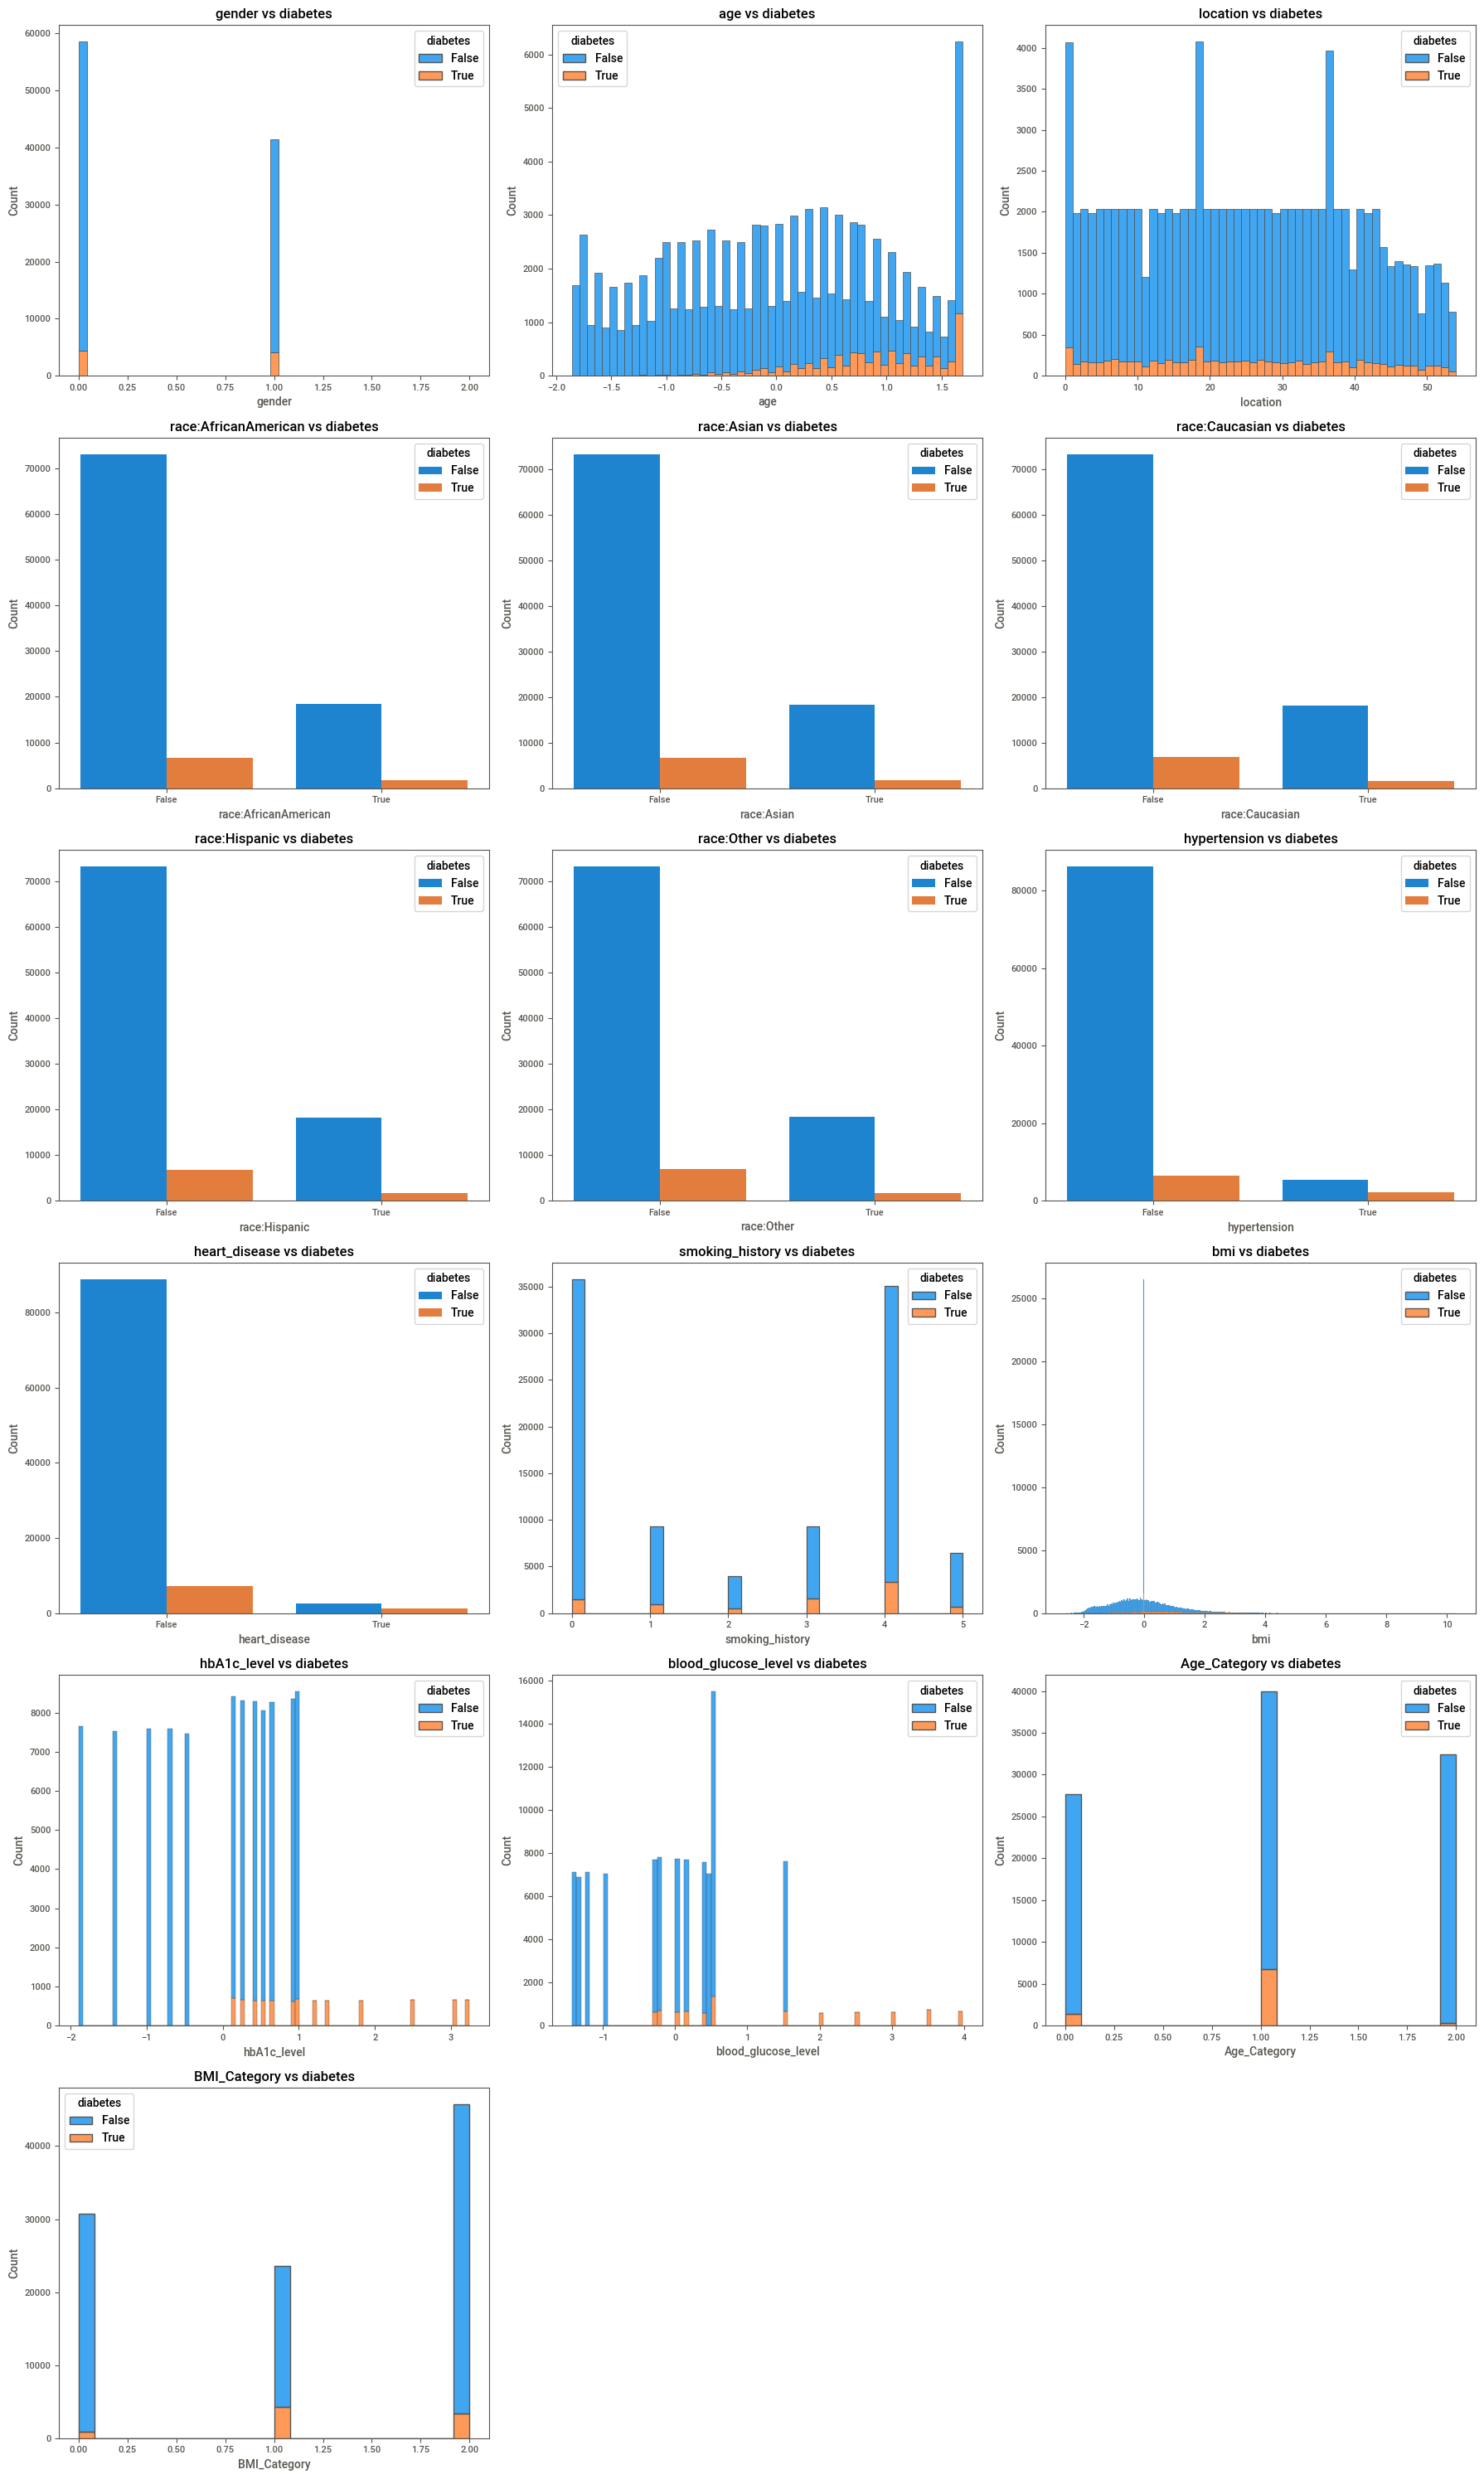

In [ ]:
def plot_features_vs_target(df, target):
    """
    Plots all independent variables against the target variable.
    Each feature-target pair is visualized separately in a subplot.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    target (str): The target variable name.
    """
    features = [col for col in df.columns if col != target]
    num_features = len(features)

    # Determine the subplot layout
    rows = int(np.ceil(num_features / 3))
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if df[feature].dtype in ['int64', 'float64']:  # Continuous variables
            sns.histplot(data=df, x=feature, hue=target, multiple="stack", kde=False, ax=axes[i])
        elif df[feature].dtype == 'bool':  # Boolean variables (discrete categories)
            sns.countplot(data=df, x=feature, hue=target, ax=axes[i])
            axes[i].set_xticks([0, 1])  # Explicitly setting tick positions
            axes[i].set_xticklabels(["False", "True"])  # Labeling boolean values
        else:  # Categorical variables
            sns.countplot(data=df, x=feature, hue=target, ax=axes[i])
            if len(df[feature].unique()) > 5:  # Avoid overlap for too many categories
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
plot_features_vs_target(df_normalized, 'diabetes')

### *Note: Dimensionality reduction (PCA) isn't necessary for this dataset.*

## Data Split (#4)

In [ ]:
df_all_ml = df_normalized.copy()
# Define Features and Target
X = df_all_ml.drop(columns=['diabetes']).apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
y = df_all_ml['diabetes'].astype(int)

# Split Data into Train, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

## Classificaiton Tree (#5-11)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}, Mean Accuracy: 0.9544
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}, Mean Accuracy: 0.9301
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}, Mean Accuracy: 0.9279
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2}, Mean Accuracy: 0.9544
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}, Mean Accuracy: 0.9301
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 15}, Mean Accuracy: 0.9279
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 2}, Mean Accuracy: 0.9544
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 5}, Mean Accuracy: 0.9301
Params: {'max_depth': 1,

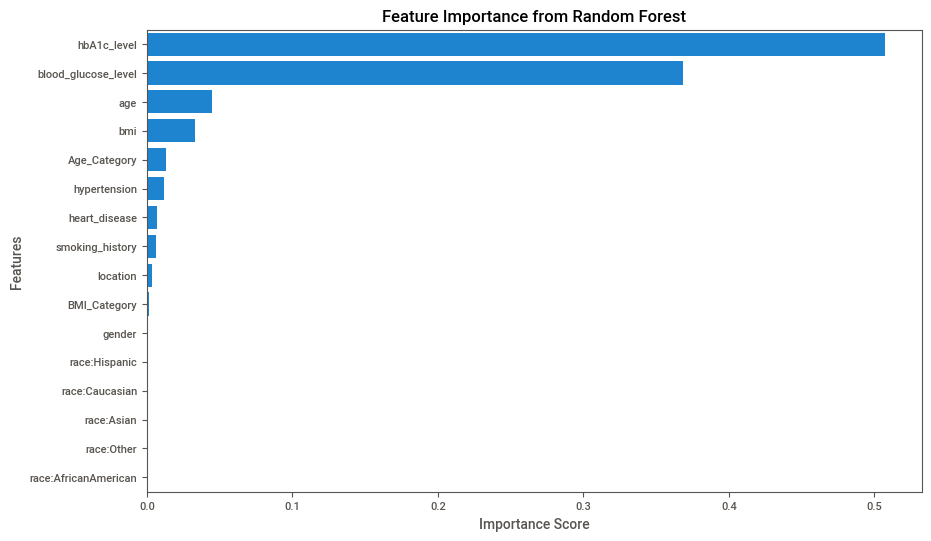

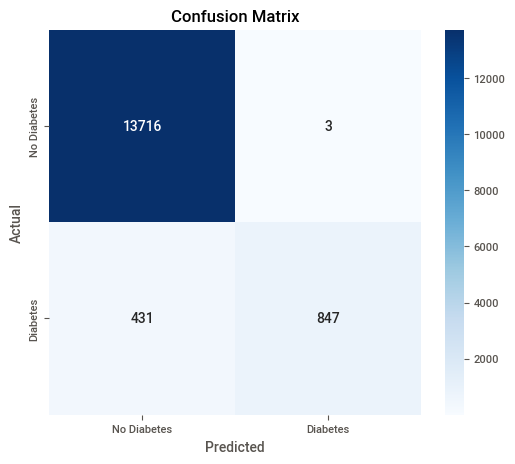

['best_diabetes_random_forest_model.pkl']

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [2, 5, 15],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

def print_model_performance(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Hyperparameters: {model.get_params()}")
    print(f"Validation Accuracy: {accuracy:.4f}\n")

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print performance for each hyperparameter combination
for params, mean_score, _ in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['std_test_score']):
    print(f"Params: {params}, Mean Accuracy: {mean_score:.4f}")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Final evaluation
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_logloss = log_loss(y_test, y_test_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Best Model Performance:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Validation Accuracy Score: {val_accuracy:.4f}")
print(f"Test Accuracy Score: {test_accuracy:.4f}")
print(f"Test Precision Score: {test_precision:.4f}")
print(f"Test Recall Score: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Log Loss: {test_logloss:.4f}")
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

# Plot Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model
joblib.dump(best_model, 'best_diabetes_random_forest_model.pkl')

### Results with less rows (records)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}, Mean Accuracy: 0.9650
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}, Mean Accuracy: 0.9400
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}, Mean Accuracy: 0.9300
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2}, Mean Accuracy: 0.9650
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}, Mean Accuracy: 0.9400
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 15}, Mean Accuracy: 0.9300
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 2}, Mean Accuracy: 0.9650
Params: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 5}, Mean Accuracy: 0.9400
Params: {'max_depth': 1,

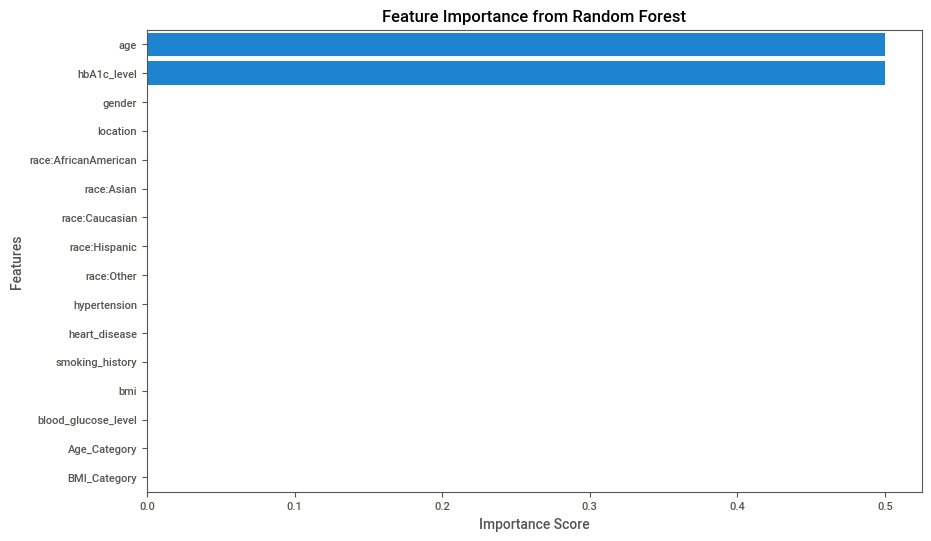

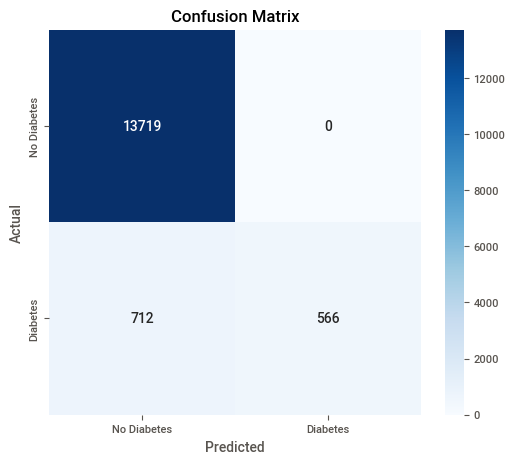

['decision_tree_mode_lessrows.pkl']

In [ ]:
X_train_less = X_train.iloc[:200, :]
y_train_less = y_train.iloc[:200]


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [2, 5, 15],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

def print_model_performance(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Hyperparameters: {model.get_params()}")
    print(f"Validation Accuracy: {accuracy:.4f}\n")

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=4, scoring='accuracy', verbose=1)
grid_search.fit(X_train_less, y_train_less)

# Print performance for each hyperparameter combination
for params, mean_score, _ in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['std_test_score']):
    print(f"Params: {params}, Mean Accuracy: {mean_score:.4f}")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Final evaluation
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_logloss = log_loss(y_test, y_test_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Best Model Performance:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Validation Accuracy Score: {val_accuracy:.4f}")
print(f"Test Accuracy Score: {test_accuracy:.4f}")
print(f"Test Precision Score: {test_precision:.4f}")
print(f"Test Recall Score: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Log Loss: {test_logloss:.4f}")
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

# Plot Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# saving the model
joblib.dump(best_model, 'decision_tree_mode_lessrows.pkl')

## More Data, Same Results – With Augmentation
Tried several techniques to add more rows, but it didn’t really boost performance it’s already pretty solid. The original dataset has around 100,000 rows, which seems to be plenty for training the model effectively.

# NN (# 7-13)

# Deafult Network

In [ ]:
# Creating the model
model = Sequential()

# Input layer
model.add(Input(shape=(len(X.columns),)))

# Hidden layer
model.add(Dense(32, activation="relu"))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 959us/step - accuracy: 0.9442 - loss: 0.1695
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - accuracy: 0.9605 - loss: 0.1149
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 955us/step - accuracy: 0.9596 - loss: 0.1160
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - accuracy: 0.9612 - loss: 0.1131
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 965us/step - accuracy: 0.9630 - loss: 0.1109
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 944us/step - accuracy: 0.9637 - loss: 0.1085
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9644 - loss: 0.1065
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step - accuracy: 0.9655 - loss: 0.1044
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - accuracy: 0.9666 - loss: 0.1016
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.9676 - loss: 0.0985
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 859us/step - accuracy: 0.9697 - loss: 0.0940
Loss: 0.095367327332

### NN Tuning Parameters

In [ ]:
# Function to create the model
def create_model(optimizer='adam', dropout_rate=0.2, neurons=64):
    print(f"Running with params: optimizer={optimizer}, dropout_rate={dropout_rate}, neurons={neurons}")
    model = keras.Sequential()
    model.add(Input(shape=(len(X.columns),)))
    model.add(layers.Dense(neurons, activation="relu"))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(int(neurons / 2), activation="relu"))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(int(neurons / 4), activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Using KerasClassifier with minimal verbosity
model = KerasClassifier(model=create_model, verbose=0)  # Suppressing per-epoch output
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#model = KerasClassifier(model=create_model, verbose=0, callbacks=[early_stopping])  # הוספת EarlyStopping

# Defining the hyperparameter grid for search
param_grid = {
    'model__optimizer': ['adam'],
    'model__dropout_rate': [0.2, 0.3],
    'model__neurons': [32, 64],
    'batch_size': [32, 64],
    'epochs': [2,20]
}

# Performing GridSearchCV with error handling
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, error_score='raise')
grid_result = grid.fit(X_train, y_train)

# Logging all parameter results
for params, mean_score, std_score in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print(f"Params: {params}, Mean Accuracy: {mean_score:.4f}, Std Dev: {std_score:.4f}")

# Displaying the best results
print(f"\nBest parameters: {grid_result.best_params_}")
print(f"Best accuracy: {grid_result.best_score_:.4f}")

# Evaluating the model on the test set
best_model = grid_result.best_estimator_
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluation metrics
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\n ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
joblib.dump(grid_result, 'nn_model.pkl')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Running with params: optimizer=adam, dropout_rate=0.2, neurons=32
[CV] END batch_size=32, epochs=2, model__dropout_rate=0.2, model__neurons=32, model__optimizer=adam; total time=   5.4s
Running with params: optimizer=adam, dropout_rate=0.2, neurons=32
[CV] END batch_size=32, epochs=2, model__dropout_rate=0.2, model__neurons=32, model__optimizer=adam; total time=   5.1s
Running with params: optimizer=adam, dropout_rate=0.2, neurons=32
[CV] END batch_size=32, epochs=2, model__dropout_rate=0.2, model__neurons=32, model__optimizer=adam; total time=   5.2s
Running with params: optimizer=adam, dropout_rate=0.2, neurons=64
[CV] END batch_size=32, epochs=2, model__dropout_rate=0.2, model__neurons=64, model__optimizer=adam; total time=   5.2s
Running with params: optimizer=adam, dropout_rate=0.2, neurons=64
[CV] END batch_size=32, epochs=2, model__dropout_rate=0.2, model__neurons=64, model__optimizer=adam; total time=   5.2s
Running w

['nn_model.pkl']

### Training NN with less rows

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def lessrows_model():
    model = keras.Sequential([
        keras.Input(shape=(len(X.columns),)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model_less = lessrows_model()

# Train the model using only the first 100 rows
history = model_less.fit(X_train[:100], y_train[:100], validation_data=(X_val[:100], y_val[:100]),
                         epochs=10, batch_size=32, verbose=0)  # Suppress per-epoch output

# Evaluate the model on train, validation, and test sets
final_train_loss, final_train_acc = model_less.evaluate(X_train[:100], y_train[:100], verbose=0)
final_val_loss, final_val_acc = model_less.evaluate(X_val[:100], y_val[:100], verbose=0)
final_test_loss, final_test_acc = model_less.evaluate(X_test[:100], y_test[:100], verbose=0)  # Added test set evaluation

print("\nTraining Completed.")
print(f"Final Training Loss: {final_train_loss:.4f}, Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}, Accuracy: {final_val_acc:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}, Accuracy: {final_test_acc:.4f}")  # Display test set results


Training Completed.
Final Training Loss: 0.2624, Accuracy: 0.9400
Final Validation Loss: 0.4755, Accuracy: 0.9200
Final Test Loss: 0.4281, Accuracy: 0.9200


### Improving NN architecture and adding a new metric (Log Loss)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13719
           1       1.00      0.63      0.77      1278

    accuracy                           0.97     14997
   macro avg       0.98      0.81      0.88     14997
weighted avg       0.97      0.97      0.96     14997

Confusion Matrix:
[[13717     2]
 [  479   799]]
ROC AUC Score: 0.8125
Log Loss: 0.0922
Final Training Loss: 0.0997, Accuracy: 0.9651
Final Validation Loss: 0.0938, Accuracy: 0.9667
Final Test Loss: 0.0922, Accuracy: 0.9679


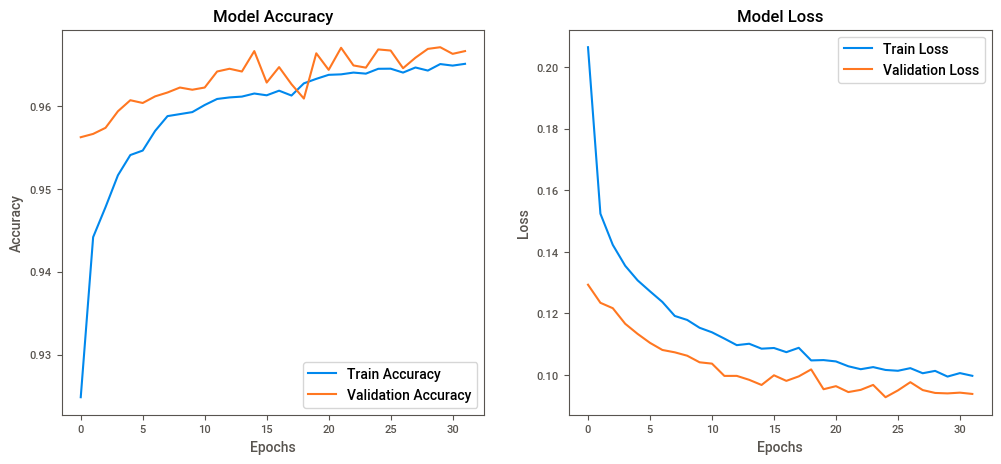

['nn_optimized_model.pkl']

In [ ]:
# Building the optimized model
def build_optimized_model():
    model = keras.Sequential([
        Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),

        layers.Dense(64, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),

        layers.Dense(32, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),

        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    return model

# Creating the optimized model
best_model = build_optimized_model()

# Early Stopping - stops if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Training the model with reduced verbosity
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                         epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

# Predicting results
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Displaying results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

# Computing Log Loss
logloss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")

# Print final training, validation, and test results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Final Training Loss: {final_train_loss:.4f}, Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}, Accuracy: {final_val_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()
# Save the model
joblib.dump(history, 'nn_optimized_model.pkl')

### Data Balancing - 3 Levels (#15)


Running model for Minimum Balance balance...

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
Final Results for Minimum Balance:
  - Accuracy: 0.9670
  - ROC AUC Score: 0.9671
  - Log Loss: 0.1002


Running model for Medium Balance balance...

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
Final Results for Medium Balance:
  - Accuracy: 0.9673
  - ROC AUC Score: 0.9692
  - Log Loss: 0.0975


Running model for Maximum Balance balance...

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Final Results for Maximum Balance:
  - Accuracy: 0.9669
  - ROC AUC Score: 0.9729
  - Log Loss: 0.0945


Final Model Performance Comparison:
       Balance Type  Accuracy   ROC AUC  Log Loss
0  Minimum Balance  0.966993  0.967064  0.100228
1   Medium Balance  0.967260  0.969187  0.097451
2  Maximum Balance  0.966860  0.972875  0.094484


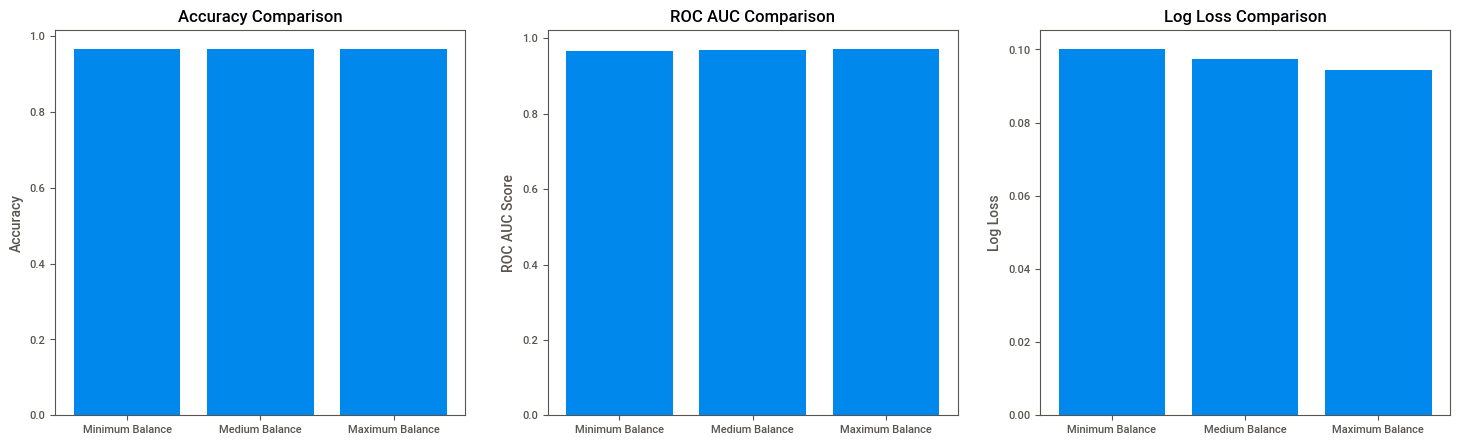

In [ ]:
# Function to create the model
def create_model(input_shape):
    model = keras.Sequential([
        Input(shape=input_shape),
        layers.Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        layers.Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_val, X_test, y_train, y_val, y_test, balance_type):
    print(f"\nRunning model for {balance_type} balance...\n")

    model = create_model(X_train.shape[1:])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Training with suppressed output
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        batch_size=32,
                        callbacks=[early_stopping],
                        verbose=0)  # Suppressed epoch-by-epoch output

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_proba = model.predict(X_test)

    # Ensure y_test is a NumPy array before flattening
    accuracy = np.mean(y_pred.flatten() == y_test.values.flatten())
    roc_auc = roc_auc_score(y_test, y_proba)
    log_loss_value = log_loss(y_test, y_proba)

    print(f"Final Results for {balance_type}:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - ROC AUC Score: {roc_auc:.4f}")
    print(f"  - Log Loss: {log_loss_value:.4f}\n")

    return model, accuracy, roc_auc, log_loss_value

# Split Data into Train, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

# Different data balance iterations (can be modified based on actual balancing strategy)
balances = {
    "Minimum Balance": (X_train[:int(0.3 * len(X_train))], y_train[:int(0.3 * len(y_train))]),
    "Medium Balance": (X_train[:int(0.6 * len(X_train))], y_train[:int(0.6 * len(y_train))]),
    "Maximum Balance": (X_train, y_train)
}

# Store evaluation results
results = {
    "Balance Type": [],
    "Accuracy": [],
    "ROC AUC": [],
    "Log Loss": []
}

# Iterate over different balances and evaluate
for balance_type, (X_bal_train, y_bal_train) in balances.items():
    model, acc, roc_auc, log_loss_value = train_and_evaluate(X_bal_train, X_val, X_test, y_bal_train, y_val, y_test, balance_type)

    # Store results
    results["Balance Type"].append(balance_type)
    results["Accuracy"].append(acc)
    results["ROC AUC"].append(roc_auc)
    results["Log Loss"].append(log_loss_value)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print("\nFinal Model Performance Comparison:\n", results_df)

# Plot Accuracy, ROC AUC, and Log Loss for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axes[0].bar(results["Balance Type"], results["Accuracy"])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")

# ROC AUC
axes[1].bar(results["Balance Type"], results["ROC AUC"])
axes[1].set_title("ROC AUC Comparison")
axes[1].set_ylabel("ROC AUC Score")

# Log Loss
axes[2].bar(results["Balance Type"], results["Log Loss"])
axes[2].set_title("Log Loss Comparison")
axes[2].set_ylabel("Log Loss")

plt.show()

### Deafult Architecture with PCA (#13)

Original shape: (99980, 16)
Reduced shape after PCA: (99980, 12)
Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9112 - loss: 0.2256 - val_accuracy: 0.9591 - val_loss: 0.1190
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9602 - loss: 0.1175 - val_accuracy: 0.9593 - val_loss: 0.1164
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9622 - loss: 0.1139 - val_accuracy: 0.9622 - val_loss: 0.1129
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9642 - loss: 0.1084 - val_accuracy: 0.9615 - val_loss: 0.1117
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9640 - loss: 0.1081 - val_accuracy: 0.9647 - val_loss: 0.1082
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9666 - loss: 0.1027 - val_accuracy: 0.9651 - val_loss: 0.1058
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9676 - loss: 0.1015 - val_accuracy: 0.9655 - val_loss: 0.1041
Epoch 8/10
2500/2500 ━━━━

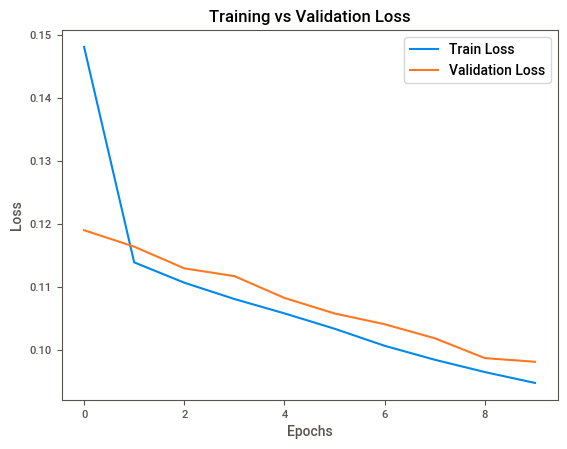

In [ ]:
# Standardizing the dataset before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA - Choose the number of components that retain 85% variance
pca = PCA(n_components=0.85)  # Retains 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Print the new shape of the data
print(f"Original shape: {X.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Creating the neural network model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))  # Use PCA-transformed input dimensions

# Hidden layer
model.add(Dense(32, activation="relu"))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()